# <h1 style="text-align: center;">Caso de estudio - Propiedad Markoviana y Homogeneidad</h1>

**Integrantes**
* Sofia Isabella Endara Chitiva
* Juan David Lasso Arias
* Néstor Andres Tabares David
* Nicolás Joel Cáceres Parra


# <h1 style='text-align: center;'>Introducción</h1>

Este estudio se centra en el mercado de divisas, analizando el comportamiento de las tasas de cambio del Yen Japonés (JPY), la Libra Esterlina (GBP), el Franco Suizo (CHF) y el Peso Mexicano (MXN) frente al Peso Colombiano (COP) durante los últimos cuatro años. El objetivo principal es explorar la dinámica de este mercado y evaluar si los movimientos de las tasas de cambio siguen un proceso markoviano; es decir, si el estado futuro de una variable depende únicamente de su estado presente y no de estados pasados. Al identificar las propiedades estadísticas de estos procesos, se busca desarrollar modelos probabilísticos para pronosticar los estados y precios futuros de las divisas extranjeras y su comportamiento en el límite. En este apartado de ejemplo, se explicará la construcción de la cadena de Markov, la prueba markoviana y la prueba de hipótesis utilizando el yen japonés (JPY) como referencia. Sin embargo, este mismo procedimiento se aplicará a todas las demás divisas.

# Librerías

Para el proyecto se utilizaron las siguientes librerías que facilitan la importación, manipulación y construcción de datos y modelos usados en el caso de estudio.

In [1]:
import pandas as pd #Para manejo de datos en DataFrames y funciónes de analítica de datos
import numpy as np #Para manejo de datos numéricos y arreglos
import matplotlib.pyplot as plt #Para la visualización de datos
import seaborn as sns #Para la visualización de datos
import scipy.stats as stats #Para realizar pruebas de hipótesis y estadiísticas
import warnings #Para evitar promptes de advertencia
import scipy.stats as stats # Para realizar ajustes de normalidad
warnings.filterwarnings('ignore') # evita warnings innecesarios al ejecutar código

# Importación de datos

Los datos fueron descargados directamente de la sección de [monedas disponibles](https://www.banrep.gov.co/es/estadisticas/monedas-disponibles)  en la página web del Banco de la República de Colombia, tomando el intervalo de tiempo del 1 de septiembre de 2020 al 1 de septiembre de 2024, con la media diaria de la tasa representativa de mercado (TRM). Este [enlace](https://totoro.banrep.gov.co/analytics/saw.dll?Go&Action=prompt&path=%2Fshared%2fSeries%20Estad%c3%adsticas_T%2F1.%20Monedas%20disponibles%2F1.2.TCM_Serie%20para%20un%20rango%20de%20fechas%20dado&Options=rdf&lang=es&NQUser=publico&NQPassword=publico123) permite realizar la consulta de los datos utilizados, teniendo en cuenta el rango de tiempos y la tasa media. El archivo fue descargado en formato CSV y cargado a un repositorio de GitHub, a partir del cual se obtuvo este [enlace](https://raw.githubusercontent.com/NicolasCacer/bases-de-datos/main/1.2.TCM_Serie%20para%20un%20rango%20de%20fechas%20dado.csv) con los datos sin procesar para que sean accesibles por cualquier persona.

In [2]:
url = 'https://raw.githubusercontent.com/NicolasCacer/bases-de-datos/main/1.2.TCM_Serie%20para%20un%20rango%20de%20fechas%20dado.csv'
df = pd.read_csv(url)
df.head()

,Fecha (dd/mm/aaaa),año,Moneda,Continente,Tipo de cambio,Tipo de tasa,Tasa Cambio,Id Moneda
0,2020-09-01,2020,Franco suizo,EUROPA,Dólares estadounidenses por cada moneda,Venta,"1,102409",CHF
1,2020-09-01,2020,Franco suizo,EUROPA,Moneda por cada dólar estadounidense,Venta,"0,9076",CHF
2,2020-09-01,2020,Franco suizo,EUROPA,Pesos colombianos por cada moneda,Venta,"4128,993489",CHF
3,2020-09-01,2020,Libra esterlina,EUROPA,Dólares estadounidenses por cada moneda,Venta,"1,345",GBP
4,2020-09-01,2020,Libra esterlina,EUROPA,Moneda por cada dólar estadounidense,Venta,"0,74377",GBP


Ya estando los datos almacenados en el DataFrame `df` se puede revisar si se han importado correctamente y su integridad. Por ende, se debe revisar si existen valores faltantes y reconocer la estructura original de la base de datos.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52632 entries, 0 to 52631
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Fecha (dd/mm/aaaa)  52632 non-null  object
 1    año                52632 non-null  int64 
 2   Moneda              52632 non-null  object
 3   Continente          52632 non-null  object
 4   Tipo de cambio      52632 non-null  object
 5   Tipo de tasa        52632 non-null  object
 6   Tasa Cambio         52632 non-null  object
 7   Id Moneda           52632 non-null  object
dtypes: int64(1), object(7)
memory usage: 3.2+ MB


Del análisis del código anterior, se pudo observar que los datos consisten en 52,632 registros para cada una de las 8 columnas, sin contener ningún dato nulo aparentemente. La información que se encuentra allí incluye la fecha, el año, el nombre de la moneda, el continente, el tipo de cambio, el tipo de tasa, la tasa de cambio y el identificador de la moneda. A continuación, se mostrarán los posibles valores que se encuentran en cada una de las columnas.


In [4]:
for i in df.select_dtypes(include='object').columns:
    print('* '+i+": \n ", df[i].unique(),'\n')

* Fecha (dd/mm/aaaa): 
  ['2020-09-01' '2020-09-02' '2020-09-03' ... '2024-08-30' '2024-08-31'
 '2024-09-01'] 

* Moneda: 
  ['Franco suizo' 'Libra esterlina' 'Peso mexicano' 'Yen japonés'] 

* Continente: 
  ['EUROPA' 'AMERICA' 'ASIA DEL PACIFICO'] 

* Tipo de cambio: 
  ['Dólares estadounidenses por cada moneda'
 'Moneda por cada dólar estadounidense'
 'Pesos colombianos por cada moneda'] 

* Tipo de tasa: 
  ['Venta' 'Media' 'Compra'] 

* Tasa Cambio: 
  ['1,102409' '0,9076' '4128,993489' ... '5466,64734' '211,76156' '28,56963'] 

* Id Moneda: 
  ['CHF' 'GBP' 'MXN' 'JPY'] 



Vale la pena resaltar que las fechas se encuentran en el formato de (aaaa/mm/dd), invertido al orden que se indica en el encabezado de los datos. Adicional, al momento de descargar los datos en formato CSV, el orden se invierte. Por esta razón, se tuvo presente esta corrección en los datos. También, los encabezados de las columnas son largos y tienen espacios entre palabras, lo que puede resultar en dificultades de interpretación para Python. En consecuencia, se procede a renombrar los encabezados de las columnas.

In [5]:
# La fecha sostendrá el formato de (aaaa/mm/dd)
df.columns = ['Fecha', ' Año', 'Nombre_Moneda', 'Continente', 'Cambio', 'Tipo_tasa', 'TRM', 'Id_Moneda']

Adicionalmente, con respecto a las fechas, se notó que los fines de semana se encuentran registrados en los datos. Así que se removerieron los datos correspondientes a sabado y domingo, se muestra a continuación porque en estos días se cierran los mercados cambiarios (Forex) y vuelven a abrir de lunes a viernes.

In [6]:
weekends = df['Fecha'].unique().tolist()[2::7]+df['Fecha'].unique().tolist()[3::7]
keep = set(df['Fecha'].unique().tolist())
dates = keep.difference(weekends)
dates =list(dates)
dates.sort()
df = df[df['Fecha'].isin(dates)]
df.head()

,Fecha,Año,Nombre_Moneda,Continente,Cambio,Tipo_tasa,TRM,Id_Moneda
0,2020-09-01,2020,Franco suizo,EUROPA,Dólares estadounidenses por cada moneda,Venta,"1,102409",CHF
1,2020-09-01,2020,Franco suizo,EUROPA,Moneda por cada dólar estadounidense,Venta,"0,9076",CHF
2,2020-09-01,2020,Franco suizo,EUROPA,Pesos colombianos por cada moneda,Venta,"4128,993489",CHF
3,2020-09-01,2020,Libra esterlina,EUROPA,Dólares estadounidenses por cada moneda,Venta,"1,345",GBP
4,2020-09-01,2020,Libra esterlina,EUROPA,Moneda por cada dólar estadounidense,Venta,"0,74377",GBP


A partir del código anterior, se puede observar toda la información almacenada en la base de datos original. Con esto, ya se pueden delimitar los datos que realmente se van a utilizar. Para este caso de estudio, se desea comparar las monedas extranjeras tomando el peso colombiano como punto de referencia; adicionalmente, se utilizará el tipo de tasa media, ya que se quiere conservar la mayor cantidad de información posible en cada dato. Al tomar la media como la tasa de cambio, se estaría involucrando la fluctuación ponderada diaria tanto de venta como de compra de las divisas. En contraste, si se tomara solo la tasa de venta o compra, se podría omitir información importante sobre el comportamiento en otro tipo de transacciones económicas intradía.

# Limpieza de datos



Ahora se requiere filtrar y reorganizar los datos, de tal manera que se obtenga una única tabla que contenga la TRM media en pesos colombianos, por cada moneda para cada fecha de registro. Adicionalmente, se observó que la TRM se encontraba en formato de texto, pero en realidad debería estar un formato numérico. En consecuencia, se requiere formatear la TRM para remplazar comas por puntos decimales y asignarles el tipo de variable `float`.

In [7]:
COP_Med_Data = df.query("Cambio == 'Pesos colombianos por cada moneda' and Tipo_tasa == 'Media'")
COP_Med_Data['TRM'] = COP_Med_Data['TRM'].str.replace(',','.').astype(float)

Ahora que ya se tiene la información de interés, se procede a realizar un nuevo DataFrame llamado `data`, el cual contendrá únicamente la TRM de cada moneda para cada fecha, asegurando que esta información se encuentre en formato `float`, como se puede observar en el código siguiente. Por lo tanto, se creará una columna por cada moneda y cada fecha corresponderá a la fecha de registro.

In [8]:
data_original = pd.DataFrame(columns=df['Id_Moneda'].unique().tolist(), index=df['Fecha'].unique())
for i in data_original.index:
    row = list(COP_Med_Data.query("Fecha == @i")['TRM'])
    data_original.loc[i] = row
data_original = data_original.astype(float)
data_original.head()

,CHF,GBP,MXN,JPY
2020-09-01,4127.855840,5036.640089,172.250270,35.335720
2020-09-02,4044.671380,4899.867379,168.704350,34.698819
2020-09-05,4045.031950,4890.420490,171.520819,34.823599
2020-09-06,4045.031950,4890.420490,171.520819,34.823599
2020-09-07,4046.358119,4879.497760,171.616219,34.838349


Al final, se obtendrá una nueva base de datos que contiene la TRM de cada moneda en pesos colombianos para cada fecha. Teniendo esto, sigue la revisión de la frecuencia temporal que se manejará para los modelos. Se decidió utilizar el tiempo en unidades diarias; es decir, se tomará un único registro diario para la tasa de cambio por moneda. Adicionalmente, conviene implementar la secuencia temporal sobre las filas para indicar el paso progresivo de los meses a partir del mes cero.

In [9]:
data = data_original.copy()
data.reset_index(drop=True, inplace=True)

Ya con el DataFrame denominado `data`, se puede realizar una breve observación del comportamiento de los datos de manera gráfica. Para ello, se revisó inicialmente cuál es la distribución de frecuencia de los precios observados para cada moneda.

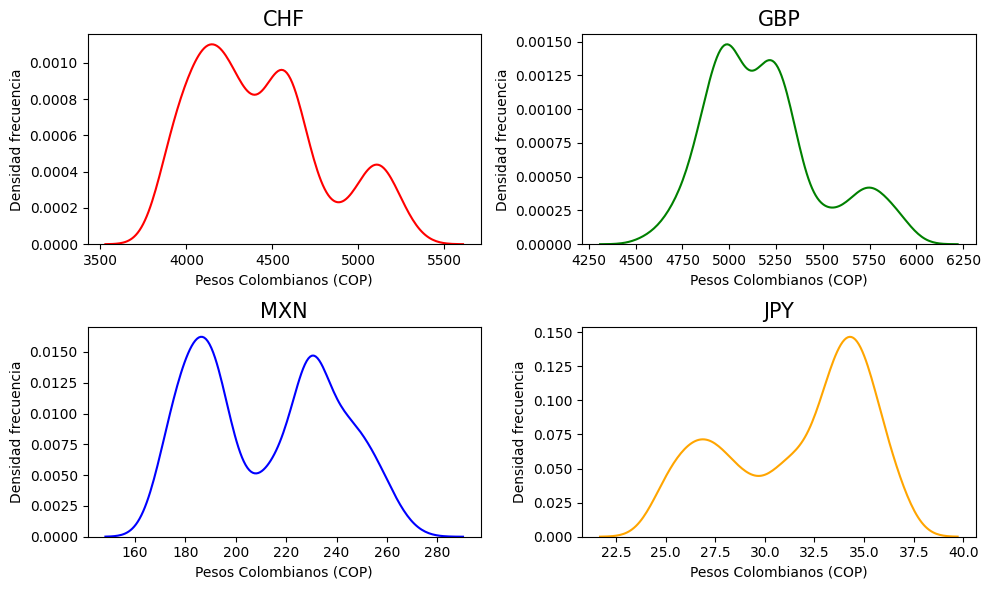

In [10]:
rows, cols = 2, 2
fig, axes = plt.subplots(rows, cols,figsize=(10, 6))
n = 0
colors = ["red", "green", "blue", "orange"]
for i in range(rows):
    for j in range(cols):
        sns.kdeplot(data = data.iloc[:,n], ax = axes[i,j], legend=True, color=colors[n])
        axes[i,j].set_xlabel('Pesos Colombianos (COP)', fontsize=10)
        axes[i,j].set_ylabel('Densidad frecuencia')
        axes[i,j].set_title(data.columns[n], fontsize = 15)
        n+=1
plt.tight_layout()
plt.show()

Como se puede observar, la mayoría de las monedas tienden a tener una distribución bimodal, que es más acentuada en monedas como el MXN. También se puede ver que las dos monedas europeas tienen, en promedio, un valor mucho más alto que las monedas de Asia y América.

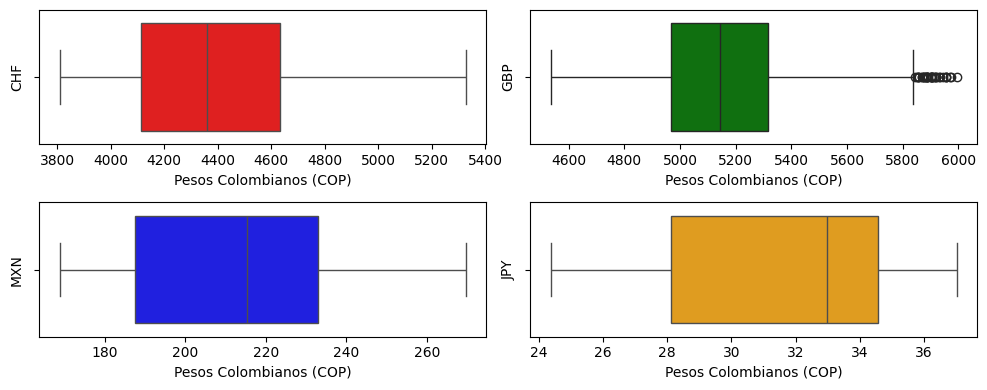

In [11]:
fig, axes = plt.subplots(rows, cols,figsize=(10, 4))
n = 0
colors = ["red", "green", "blue", "orange"]
for i in range(rows):
    for j in range(cols):
        sns.boxplot(x = data.iloc[:,n], ax = axes[i,j], legend=True, color=colors[n])
        axes[i,j].set_xlabel('Pesos Colombianos (COP)')
        axes[i,j].set_ylabel(data.columns[n], fontsize=10)
        n+=1
plt.tight_layout()
plt.show()

A partir de estos diagramas de Boxplot, se puede observar que la única moneda que presentó valores atípicos es la libra esterlina, cuando su precio subía por encima de de los $5.843 COP aproximadamente. Esto sugiere que para reducir el ruido en los datos, se podrían remover estos valores del modelo cuando se utilice la GBP.

In [12]:
q1 = data['GBP'].quantile(0.25)
q3 = data['GBP'].quantile(0.75)
upper_limit = q3 + 1.5 * (q3 - q1)
print('$',upper_limit.round(5), 'COP')

$ 5841.76526 COP


Como se puede observar, los precios por encima de esa barrera son los que muestran el comportamiento atípico de la moneda. Esto se tendrá presente para los modelos.

# <h1 style="text-align: center;">Estructuración Del Modelo</h1>

En esta sección, se llevará a cabo la definición de los estados finitos de la cadena de Markov y la creación del modelo que se ajuste a cada una de las divisas.

## Estados del mercado
Para este modelo se trabaja bajos los supuestos de que la variable aleatoria de precio en el día t opera en un espacio muestral de 6 estados posibles según dos criterios, la variación porcentual y la desviación estándar móvil. Con estos dos indicadores se clasificó la dirección y la intensidad de la variación de precio en el día t. Los estados a utilizar tendrán tendencias bajistas (B) y alcistas (S) y una categoría de la fuerza del cambio (1, 2 y 3).

In [13]:
Estados = ['B3','B2','B1','S1','S2','S3']
def final_states(D=data, currency="JPY", n_per=20,only_states=True):  # la ventana de tiempo para la desviación móvil es 20 días
    currency = currency.upper()
    D = pd.DataFrame(data[currency])
    D['Mob_std'] = D[currency].rolling(n_per).std()
    D['Cambio_%'] = D[currency].pct_change()
    D = D[n_per:]
    D['Estado'] = np.where(D['Cambio_%'] < -2 * D['Mob_std'] / D[currency], Estados[0],
                    np.where(((-2 * D['Mob_std'] / D[currency] <= D['Cambio_%']) & (D['Cambio_%'] < -1 * D['Mob_std'] / D[currency])), Estados[1],
                    np.where(((-1 * D['Mob_std'] / D[currency] <= D['Cambio_%']) & (D['Cambio_%'] < 0)), Estados[2],
                    np.where(((0 <= D['Cambio_%']) & (D['Cambio_%'] < D['Mob_std'] / D[currency])), Estados[3],
                    np.where(((D['Mob_std'] / D[currency] <= D['Cambio_%']) & (D['Cambio_%'] < 2 * D['Mob_std'] / D[currency])), Estados[4],Estados[5])))))
    if only_states:
        D = D.drop(columns=[currency, 'Mob_std', 'Cambio_%'])
    D.reset_index(drop=True, inplace=True)
    return D

El propósito es clasificar los cambios en el valor de una moneda en diferentes estados, basados en su cambio porcentual y su desviación estándar móvil. Al hacerlo, se pueden identificar patrones y tendencias en el comportamiento de la moneda a lo largo del tiempo, lo cual es útil para la toma de decisiones con la matriz de transición, ya que permite evaluar la volatilidad y la dirección de los movimientos del mercado. En este caso, los 6 estados de las divisas son los siguientes, denotando como σ$_{tl}$ la desviación estándar móvil de la moneda y Y$_{n}$ como la variación en el día $n$:

* B3: Y$_{n}$ &lt; -2σ$_{tl}$
* B2: -2σ$_{tl}$ &le; Y$_{n}$ &lt; -σ$_{tl}$
* B1: -σ$_{tl}$ &le; Y$_{n}$ &lt; 0
* S1: 0 &le; Y$_{n}$ &lt; σ$_{tl}$
* S2: σ$_{tl}$ &le; Y$_{n}$ &lt; 2σ$_{tl}$
* S3: 2σ$_{tl}$ &le; Y$_{n}$

## Cadena de Markov de Primer Orden

A continuación se realiza la construcción de un modelo de Markov paso a paso que luego será automatizado en una única función. Para efectos de este ejemplo, se usará la moneda de Japón.

In [14]:
Data = final_states(currency='JPY')
Data.head()

,Estado
0,B1
1,S1
2,S1
3,S1
4,B1


La función `final_states` permite clasificar los estado de la moneda indicada como argumento, además de que desfasa los datos de acuerdo con la ventana de tiempo de la desviación estándar móvil.

### Estado Anterior, Actual y Siguiente

In [15]:
Data.columns = ["x_t"]
Data["x_t+1"] = Data["x_t"].shift(-1)
Data["x_t+2"] = Data["x_t+1"].shift(-1)
Data.head()

,x_t,x_t+1,x_t+2
0,B1,S1,S1
1,S1,S1,S1
2,S1,S1,B1
3,S1,B1,B1
4,B1,B1,B1


En este caso, con la divisa de Japón se categoriza con la función mencionada anteriormente `final_state`, y se crean dos columnas más: `Actual y Siguiente`, que permiten analizar cómo los estados de la moneda cambian en los periodos, proporcionando una visión más completa de las tendencias y patrones a lo largo del tiempo.

### Frecuencia Observada

In [16]:
freq_obs = pd.DataFrame(columns=("Anterior", "Actual"))
for i in Estados:
    for j in Estados:
        freq_obs.loc[len(freq_obs)] = [i,j]
freq_obs = pd.concat([freq_obs,pd.DataFrame(np.zeros((freq_obs.shape[0],len(Estados)+1)),columns=Estados+['Total'])], axis=1)
for i in range(len(Data)-2):
    secuencia = Data.loc[i].tolist()
    freq_obs.loc[(freq_obs['Anterior'] == secuencia[0]) & (freq_obs['Actual'] == secuencia[1]),secuencia[2]] += 1
freq_obs['Total'] = freq_obs[Estados].sum(axis=1)

Se realiza una tabla de frecuencia en el cual se examinan todas las combinaciones posibles entre los valores de las columnas `Anterior, Actual y Siguiente`; y para cada combinación única identificada en la base de datos denominada `Data`, se procede a contabilizar la frecuencia de su aparición.

### Frecuencia Esperada

In [17]:
freq_esp = freq_obs.copy()
freq_esp.iloc[:,2:] = 0
for i in range(len(Data)-2):
    secuencia = Data.loc[i].tolist()
    freq_esp.loc[freq_esp['Actual'] == secuencia[1],secuencia[2]] += 1
freq_esp['Total'] = freq_esp[Estados].sum(axis=1)

Se elabora una tabla de `frecuencia esperada` donde se incluyen todas las columnas presentes en la tabla de frecuencia observada, con la excepción de la columna `Anterior`; y se identifica y contabiliza la frecuencia de cada combinación única de valores presentes en la tabla de `frecuencia esperada` de la base de datos `Data`.

In [18]:
porcentaje_menor_5 = (freq_obs[Estados] < 5).mean() * 100
hay_ceros = (freq_obs["Total"] == 0).any()
if porcentaje_menor_5.mean() > 25 or hay_ceros:
    print("Se necesitó agrupar dado que los datos menores a 5 represetan más del 25% del total o hay 0 en la columna total")
    freq_obs = freq_obs.groupby("Anterior").sum().reset_index()
    freq_esp = freq_esp.groupby("Anterior").sum().reset_index()

Se necesitó agrupar dado que los datos menores a 5 represetan más del 25% del total o hay 0 en la columna total


 Dado que en esta tabla más del 25% de los registros presentan una frecuencia inferior a 5, se requiere la concatenación de filas.

In [19]:
freq_obs

,Anterior,Actual,B3,B2,B1,S1,S2,S3,Total
0,B1,B3B2B1S1S2S3,5.0,15.0,125.0,210.0,21.0,4.0,380.0
1,B2,B3B2B1S1S2S3,0.0,1.0,19.0,26.0,1.0,1.0,48.0
2,B3,B3B2B1S1S2S3,0.0,0.0,5.0,6.0,0.0,0.0,11.0
3,S1,B3B2B1S1S2S3,5.0,29.0,211.0,235.0,31.0,6.0,517.0
4,S2,B3B2B1S1S2S3,0.0,2.0,14.0,36.0,3.0,0.0,55.0
5,S3,B3B2B1S1S2S3,1.0,1.0,5.0,4.0,0.0,0.0,11.0


Tabla de frecuencias observadas

In [20]:
freq_esp

,Anterior,Actual,B3,B2,B1,S1,S2,S3,Total
0,B1,B3B2B1S1S2S3,11.0,48.0,379.0,517.0,56.0,11.0,1022.0
1,B2,B3B2B1S1S2S3,11.0,48.0,379.0,517.0,56.0,11.0,1022.0
2,B3,B3B2B1S1S2S3,11.0,48.0,379.0,517.0,56.0,11.0,1022.0
3,S1,B3B2B1S1S2S3,11.0,48.0,379.0,517.0,56.0,11.0,1022.0
4,S2,B3B2B1S1S2S3,11.0,48.0,379.0,517.0,56.0,11.0,1022.0
5,S3,B3B2B1S1S2S3,11.0,48.0,379.0,517.0,56.0,11.0,1022.0


Tabla de frecuencias esperadas

### Probabilidad observada y esperada

Para calcular la probabilidades observadas y esperadas se necesita de las tablas de `frecuencia observada y esperada`, las columnas `Estados`, y dividir eso entre el total de cada una de las frecuencias respectivas.

In [21]:
prob_obs = freq_obs[Estados].div(freq_obs["Total"], axis=0)
prob_esp = freq_esp[Estados].div(freq_esp["Total"], axis=0)

### Prueba de Hipótesis Propiedad Markoviana

Esta prueba se realiza con el fin de determinar si la cadena no cumple con la propiedad Markoviana, o si por el contrario se favorece la hipótesis nula de que la cadena sigue la propiedad de Markov, esto se realiza por medio de la distribución chi cuadrado, comparando el valor calculado con el valor de la distribución. 

In [22]:
chi_2 = (((prob_obs - prob_esp) ** 2 / prob_esp).sum(axis=1) * freq_obs["Total"]).sum()
deg_free = (prob_esp.shape[1]-1)*(prob_esp.shape[0]-1)
alpha = 0.05
chi2_inv = stats.chi2.ppf(1-alpha, deg_free)
if chi_2 < chi2_inv:
    Markov = "No se rechaza Ho"
else:
    Markov = "Se rechaza Ho"
print(Markov)

No se rechaza Ho


Se determina el valor crítico `chi2_inv` para un nivel de significancia del `5%`. Si el estadístico `chi-cuadrado` es menor que el valor crítico, no se rechaza la hipótesis nula `Ho`, lo que sugiere que el proceso puede ser modelado como una cadena de Markov. De lo contrario, se rechaza la hipótesis nula.

Creación de la tabla de frecuencia markoviana (Anterior y Actual)

In [23]:
freq_Markov = pd.DataFrame(0,columns= Estados+["Total"], index=Estados)
for i in range(len(Data)-1):
    secuencia = Data.loc[i].tolist()[:2]
    freq_Markov.loc[secuencia[0],secuencia[1]]+= 1
freq_Markov["Total"] = freq_Markov.sum(axis=1)

Se realiza una tabla de frecuencia en el cual se examinan todas las combinaciones posibles entre los valores de las columnas `Anterior y Actual`. Para cada combinación única identificada en la base de datos denominada `Data`, se procede a contabilizar la frecuencia de su aparición.

### Matriz de transición

In [24]:
prob_Markov = freq_Markov[Estados].div(freq_Markov["Total"], axis=0)
prob_Markov["Total"] = prob_Markov.sum(axis=1)
prob_Markov

,B3,B2,B1,S1,S2,S3,Total
B3,0.000000,0.000000,0.090909,0.909091,0.000000,0.000000,1.0
B2,0.020833,0.083333,0.104167,0.708333,0.083333,0.000000,1.0
B1,0.007895,0.050000,0.368421,0.481579,0.076316,0.015789,1.0
S1,0.005803,0.042553,0.427466,0.479691,0.038685,0.005803,1.0
S2,0.053571,0.053571,0.142857,0.660714,0.053571,0.035714,1.0
S3,0.090909,0.000000,0.363636,0.545455,0.000000,0.000000,1.0


Para calcular la matriz de transición se toman los datos de la columna `Estados` de la tabla de `frecuencia de transición` y se divide en el total de la misma tabla.

### Función markoviana

Esta función crea la matriz de transición y la prueba de hipótesis de la cadena de Markov para cualquier divisa, con su respectiva limpieza de datos. Adicional, la función indica si fue necesaria la concatenación de filas debido a la falta de representación, y el resultado de la prueba de hipótesis. 

In [25]:
def markoviana(currency = "JPY", n_periods = 20, prints=True):

    Data = final_states(currency= currency, n_per= n_periods)
    Data.columns = ["x_t"]
    Data["x_t+1"] = Data["x_t"].shift(-1)
    Data["x_t+2"] = Data["x_t+1"].shift(-1)
    freq_obs = pd.DataFrame(columns=("Anterior", "Actual"))
    for i in Estados:
        for j in Estados:
            freq_obs.loc[len(freq_obs)] = [i,j]
    freq_obs = pd.concat([freq_obs,pd.DataFrame(np.zeros((freq_obs.shape[0],len(Estados)+1)),columns=Estados+['Total'])], axis=1)
    for i in range(len(Data)-2):
        secuencia = Data.loc[i].tolist()
        freq_obs.loc[(freq_obs['Anterior'] == secuencia[0]) & (freq_obs['Actual'] == secuencia[1]),secuencia[2]] += 1
    freq_obs['Total'] = freq_obs[Estados].sum(axis=1)
    freq_esp = freq_obs.copy()
    freq_esp.iloc[:,2:] = 0
    for i in range(len(Data)-2):
        secuencia = Data.loc[i].tolist()
        freq_esp.loc[freq_esp['Actual'] == secuencia[1],secuencia[2]] += 1
    freq_esp['Total'] = freq_esp[Estados].sum(axis=1)
    porcentaje_menor_5 = (freq_obs[Estados] < 5).mean() * 100
    hay_ceros = (freq_obs["Total"] == 0).any()
    porcentaje_menor_5 = (freq_obs[Estados] < 5).mean() * 100
    hay_ceros = (freq_obs["Total"] == 0).any()
    if (porcentaje_menor_5.mean() > 25 or hay_ceros) and prints:
        print("Se necesito agrupar dado que los datos menores a 5 represetan más del 25% del total o hay 0 en la columna total")
        print("---"*100)
        freq_obs = freq_obs.groupby("Anterior").sum().reset_index()
        freq_esp = freq_esp.groupby("Anterior").sum().reset_index()
    prob_obs = freq_obs[Estados].div(freq_obs["Total"], axis=0)
    prob_esp = freq_esp[Estados].div(freq_esp["Total"], axis=0)
    resultado = ((prob_obs - prob_esp) ** 2 / prob_esp).sum(axis=1) * freq_obs["Total"]
    chi_2 = (((prob_obs - prob_esp) ** 2 / prob_esp).sum(axis=1) * freq_obs["Total"]).sum()
    deg_free = (prob_esp.shape[1]-1)*(prob_esp.shape[0]-1)
    alpha = 0.05
    chi2_inv = stats.chi2.ppf(1-alpha, deg_free)
    if chi_2 < chi2_inv:
        Markov = "No se rechaza Ho"
    else:
        Markov = "Se rechaza Ho"
    freq_Markov = pd.DataFrame(0,columns= Estados+["Total"], index=Estados)
    for i in range(len(Data)-1):
        secuencia = Data.loc[i].tolist()[:2]
        freq_Markov.loc[secuencia[0],secuencia[1]]+= 1
    freq_Markov["Total"] = freq_Markov.sum(axis=1)
    
    prob_Markov = freq_Markov[Estados].div(freq_Markov["Total"], axis=0)
    prob_Markov["Total"] = prob_Markov.sum(axis=1)

    if prints:
        print(f"-> Hipotesis markoviana\n {Markov}")
        print("-----"*10)
        print(f"-> Matriz de transición")
        print(prob_Markov)
        
    return prob_Markov

### Modelo de Markoviana para JPY

In [26]:
mt_jpy = markoviana(currency= "JPY")

Se necesito agrupar dado que los datos menores a 5 represetan más del 25% del total o hay 0 en la columna total
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
-> Hipotesis markoviana
 No se rechaza Ho
--------------------------------------------------
-> Matriz de transición
          B3        B2        B1        S1        S2        S3  Total
B3  0.000000  0.000000  0.090909  0.909091  0.000000  0.000000    1.0
B2  0.020833  0.083333  0.104167  0.708333  0.083333  0.000000    1.0
B1  0.007895  0.050000  0.368421  0.481579  0.076316  0.015789    1.0
S1  0.005803  0.042553  0.427466  0.479691  0.038685  0.005803    1.0
S2  0.053571  0.053571  0.142857  0.660714  0.053571  0.035714    1.0
S3  0.090909  0.000000  0.363636  0.545455  0.0000

### Modelo de Markoviana para MXN

In [27]:
mt_mxn= markoviana("MXN")

Se necesito agrupar dado que los datos menores a 5 represetan más del 25% del total o hay 0 en la columna total
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
-> Hipotesis markoviana
 No se rechaza Ho
--------------------------------------------------
-> Matriz de transición
          B3        B2        B1        S1        S2        S3  Total
B3  0.000000  0.133333  0.200000  0.666667  0.000000  0.000000    1.0
B2  0.025974  0.025974  0.103896  0.571429  0.168831  0.103896    1.0
B1  0.013514  0.077703  0.239865  0.564189  0.077703  0.027027    1.0
S1  0.009124  0.074818  0.359489  0.509124  0.040146  0.007299    1.0
S2  0.015385  0.123077  0.200000  0.553846  0.076923  0.030769    1.0
S3  0.136364  0.045455  0.181818  0.545455  0.0909

### Modelo de Markoviana para CHF

In [28]:
mt_chf=markoviana("CHF")

Se necesito agrupar dado que los datos menores a 5 represetan más del 25% del total o hay 0 en la columna total
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
-> Hipotesis markoviana
 No se rechaza Ho
--------------------------------------------------
-> Matriz de transición
          B3        B2        B1        S1        S2        S3  Total
B3  0.000000  0.000000  0.090909  0.909091  0.000000  0.000000    1.0
B2  0.000000  0.078125  0.093750  0.703125  0.062500  0.062500    1.0
B1  0.012308  0.049231  0.320000  0.526154  0.080000  0.012308    1.0
S1  0.009058  0.068841  0.365942  0.505435  0.038043  0.012681    1.0
S2  0.037037  0.074074  0.185185  0.648148  0.055556  0.000000    1.0
S3  0.000000  0.058824  0.117647  0.705882  0.0000

### Modelo de Markoviana para GBP

In [29]:
mt_gbp = markoviana("GBP")

Se necesito agrupar dado que los datos menores a 5 represetan más del 25% del total o hay 0 en la columna total
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
-> Hipotesis markoviana
 No se rechaza Ho
--------------------------------------------------
-> Matriz de transición
          B3        B2        B1        S1        S2        S3  Total
B3  0.000000  0.090909  0.181818  0.636364  0.000000  0.090909    1.0
B2  0.000000  0.053571  0.107143  0.750000  0.071429  0.017857    1.0
B1  0.014749  0.044248  0.309735  0.513274  0.100295  0.017699    1.0
S1  0.005545  0.053604  0.391867  0.500924  0.035120  0.012939    1.0
S2  0.049180  0.114754  0.180328  0.606557  0.049180  0.000000    1.0
S3  0.000000  0.066667  0.133333  0.733333  0.0666

En general, se puede observar que según los datos históricos, todas las divisas cumplen con la propiedad markoviana, lo que quiere decir que el estado siguiente depende únicamente del estado actual, y no de la historia antes de eso.

# Prueba de Homogeneidad

El concepto de homogeneidad en una cadena de markov indica que, sin importar el día n en el que se encuentre la cadena, las probabilidades que se observan en las matrices de transición de cada moneda se mantienen constantes, es decir, las probabilidades de transición son las mismas, por ejemplo, de un lunes a un martes que de un jueves a un viernes. Para demostrar esto se agrupan los datos por periodos, para demostrar que sin importar el periodo al que pertenezcan, las probabilidades de transición son significativamente iguales en cada periodo.

## Creación de los periodos

In [30]:
dh = final_states(currency= "JPY")
dh.insert(0, 'Periodo', None)
dh["Siguiente"] = dh["Estado"].shift(-1)
dh.columns = ["Periodo", "Actual", "Siguiente"]
dh.index = dates[20:]
años = list(set([año[:4] for año in dh.index.to_list()]))
años.sort()
periodos = []
for i in años:
    f = [año[:4] for año in dh.index.to_list() if i == año[:4]]
    f = f[:len(f)-1] +["-"]
    periodos.extend(f)
dh['Periodo'] = periodos
dh.reset_index(drop= True, inplace= True)
dh.head()

,Periodo,Actual,Siguiente
0,2020,B1,S1
1,2020,S1,S1
2,2020,S1,S1
3,2020,S1,B1
4,2020,B1,B1


Se clasifica la divisa en las diferentes categorias que existe con la función `final_state`, luego se crean las columnas `Actual y Siguiente` donde se registran las categorias. Por último, se crea la columna `Periodo` en la cual se asignan periodos basados en los años presentes en las fechas del DataFrame `dh`.

## Frecuencia observada 

In [31]:
freq_obs = pd.DataFrame(columns=("periodo", "Actual") )
for i in años:
    for j in Estados:
        freq_obs.loc[len(freq_obs)] = [i,j]
freq_obs = pd.concat([freq_obs,pd.DataFrame(np.zeros((freq_obs.shape[0],len(Estados)+1)),columns=Estados+['Total'])], axis=1)
for i in range(len(dh)-1):
    secuencia = dh.loc[i].tolist()
    freq_obs.loc[(freq_obs['periodo'] == secuencia[0]) & (freq_obs['Actual'] == secuencia[1]),secuencia[2]] += 1
freq_obs['Total'] = freq_obs[Estados].sum(axis=1)

Se realiza una tabla de frecuencia observada en la cual, se examinan todas las combinaciones posibles entre los valores de las columnas `Periodo, Actual y Siguiente`. Para cada combinación única identificada en la base de datos denominada `dh`, se procede a contabilizar la frecuencia de su aparición.

## Frecuencia esperada

In [32]:
freq_esp = freq_obs.copy()
freq_esp.iloc[:,2:] = 0
for i in range(len(dh)-1):
    secuencia = dh.loc[i].tolist()
    freq_esp.loc[freq_esp['Actual'] == secuencia[1],secuencia[2]] += 1
freq_esp['Total'] = freq_esp[Estados].sum(axis=1)

Se elabora una tabla de `frecuencia esperada`, donde se incluyen todas las columnas presentes en la tabla de frecuencia observada, con la excepción de la columna `Periodo`. Se identifica y contabiliza la frecuencia de cada combinación única de valores presentes en la tabla de `frecuencia esperada` de la base de datos `dh`.

In [33]:
porcentaje_menor_5 = (freq_obs[Estados] < 5).mean() * 100
hay_ceros = (freq_obs["Total"] == 0).any()
if porcentaje_menor_5.mean() > 25 or hay_ceros:
    print("Se necesitó agrupar dado que los datos menores a 5 represetan más del 25% del total o hay 0 en la columna total")
    freq_obs = freq_obs.groupby("periodo").sum().reset_index()
    freq_esp = freq_esp.groupby("periodo").sum().reset_index()

Se necesitó agrupar dado que los datos menores a 5 represetan más del 25% del total o hay 0 en la columna total


## Probabilidad observada y esperada

In [34]:
prob_obs = freq_obs[Estados].div(freq_obs["Total"], axis=0)
prob_esp = freq_esp[Estados].div(freq_esp["Total"], axis=0)


Para calcular las probabilidades observadas y esperadas, es necesario contar con las tablas de frecuencia observada y frecuencia esperada. Se deben tomar las frecuencias correspondientes a cada columna de Estados y dividirlas entre el total de frecuencias de cada tabla, respectivamente.

## Función Homogeneidad

Esta función crea la matriz de transición y realiza la prueba de hipótesis para homogeneidad de cualquier divisa, con su respectiva limpieza de datos.

In [35]:
def homogenio(currency = "JPY", prints=True):
    dh = final_states(currency= "JPY")
    dh.insert(0, 'Periodo', None)
    dh["Siguiente"] = dh["Estado"].shift(-1)
    dh.columns = ["Periodo", "Actual", "Siguiente"]
    dh.index = dates[20:]
    años = list(set([año[:4] for año in dh.index.to_list()]))
    años.sort()
    periodos = []
    for i in años:
        f = [año[:4] for año in dh.index.to_list() if i == año[:4]]
        f = f[:len(f)-1] +["-"]
        periodos.extend(f)
    dh['Periodo'] = periodos
    dh.reset_index(drop= True, inplace= True)
    freq_obs = pd.DataFrame(columns=("periodo", "Actual") )
    for i in años:
        for j in Estados:
            freq_obs.loc[len(freq_obs)] = [i,j]
    freq_obs = pd.concat([freq_obs,pd.DataFrame(np.zeros((freq_obs.shape[0],len(Estados)+1)),columns=Estados+['Total'])], axis=1)
    for i in range(len(dh)-1):
        secuencia = dh.loc[i].tolist()
        freq_obs.loc[(freq_obs['periodo'] == secuencia[0]) & (freq_obs['Actual'] == secuencia[1]),secuencia[2]] += 1
    freq_obs['Total'] = freq_obs[Estados].sum(axis=1)
    freq_esp = freq_obs.copy()
    freq_esp.iloc[:,2:] = 0
    for i in range(len(dh)-1):
        secuencia = dh.loc[i].tolist()
        freq_esp.loc[freq_esp['Actual'] == secuencia[1],secuencia[2]] += 1
    freq_esp['Total'] = freq_esp[Estados].sum(axis=1)
    Matriz_transicion = freq_esp[Estados].div(freq_esp["Total"], axis=0).iloc[:len(Estados)]
    Matriz_transicion.index = Estados
    porcentaje_menor_5 = (freq_obs[Estados] < 5).mean() * 100
    hay_ceros = (freq_obs["Total"] == 0).any()
    if (porcentaje_menor_5.mean() > 25 or hay_ceros) and prints:
        print("Se necesitó agrupar dado que los datos menores a 5 represetan más del 25% del total o hay 0 en la columna total")
        freq_obs = freq_obs.groupby("periodo").sum().reset_index()
        freq_esp = freq_esp.groupby("periodo").sum().reset_index()
    prob_obs = freq_obs[Estados].div(freq_obs["Total"], axis=0)
    prob_esp = freq_esp[Estados].div(freq_esp["Total"], axis=0)
    resultado = ((prob_obs - prob_esp) ** 2 / prob_esp).sum(axis=1) * freq_obs["Total"]
    chi_2 = resultado.sum()
    deg_free = (prob_esp.shape[1]-1)*(prob_esp.shape[0]-1)
    alpha = 0.05
    chi2_inv = stats.chi2.ppf(1-alpha, deg_free)
    if chi_2 < chi2_inv:
        Homogenea = "No se rechaza Ho"
    else:
        Homogenea = "Se rechaza Ho"
    if prints:
        print("----"*100)
        print("Prueba de homogeneidad")
        print(Homogenea)
        print("Matriz de transición")
        print(Matriz_transicion)

## Homogeneidad para el JPY

In [36]:
homogenio(currency= "JPY")

Se necesitó agrupar dado que los datos menores a 5 represetan más del 25% del total o hay 0 en la columna total
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Prueba de homogeneidad
No se rechaza Ho
Matriz de transición
          B3        B2        B1        S1        S2        S3
B3  0.000000  0.000000  0.090909  0.909091  0.000000  0.000000
B2  0.020833  0.083333  0.104167  0.708333  0.083333  0.000000
B1  0.007895  0.050000  0.368421  0.481579  0.076316  0.015789
S1  0.005803  0.042553  0.427466  0.479691  0.038685  0.005803
S2  0.053571  0.053571  0.142857  0.660714  0.053571  0.035714
S3  0.090909  0.000000  0.363636  0.545455  0.00

Para la divisa Japonesa fue necesario concatenar filas debido a la falta de representación, para posteriormente obtener que no se rechaza la hipótesis nula en la prueba de homogeneidad.

## Homogeneidad para el MXN

In [37]:
homogenio(currency= "MXN")

Se necesitó agrupar dado que los datos menores a 5 represetan más del 25% del total o hay 0 en la columna total
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Prueba de homogeneidad
No se rechaza Ho
Matriz de transición
          B3        B2        B1        S1        S2        S3
B3  0.000000  0.000000  0.090909  0.909091  0.000000  0.000000
B2  0.020833  0.083333  0.104167  0.708333  0.083333  0.000000
B1  0.007895  0.050000  0.368421  0.481579  0.076316  0.015789
S1  0.005803  0.042553  0.427466  0.479691  0.038685  0.005803
S2  0.053571  0.053571  0.142857  0.660714  0.053571  0.035714
S3  0.090909  0.000000  0.363636  0.545455  0.00

Para la divisa mexicana fue necesario concatenar filas debido a la falta de representación, para posteriormente obtener que no se rechaza la hipótesis nula en la prueba de homogeneidad.

## Homogeneidad para el CHF

In [38]:
homogenio(currency= "CHF")

Se necesitó agrupar dado que los datos menores a 5 represetan más del 25% del total o hay 0 en la columna total
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Prueba de homogeneidad
No se rechaza Ho
Matriz de transición
          B3        B2        B1        S1        S2        S3
B3  0.000000  0.000000  0.090909  0.909091  0.000000  0.000000
B2  0.020833  0.083333  0.104167  0.708333  0.083333  0.000000
B1  0.007895  0.050000  0.368421  0.481579  0.076316  0.015789
S1  0.005803  0.042553  0.427466  0.479691  0.038685  0.005803
S2  0.053571  0.053571  0.142857  0.660714  0.053571  0.035714
S3  0.090909  0.000000  0.363636  0.545455  0.00

Para el franco suizo fue necesario concatenar filas debido a la falta de representación, para posteriormente obtener que no se rechaza la hipótesis nula en la prueba de homogeneidad.

## Homogeneidad para el GBP

In [39]:
homogenio(currency="GBP")

Se necesitó agrupar dado que los datos menores a 5 represetan más del 25% del total o hay 0 en la columna total
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Prueba de homogeneidad
No se rechaza Ho
Matriz de transición
          B3        B2        B1        S1        S2        S3
B3  0.000000  0.000000  0.090909  0.909091  0.000000  0.000000
B2  0.020833  0.083333  0.104167  0.708333  0.083333  0.000000
B1  0.007895  0.050000  0.368421  0.481579  0.076316  0.015789
S1  0.005803  0.042553  0.427466  0.479691  0.038685  0.005803
S2  0.053571  0.053571  0.142857  0.660714  0.053571  0.035714
S3  0.090909  0.000000  0.363636  0.545455  0.00

Para la libra esterlina fue necesario concatenar filas debido a la falta de representación, para posteriormente obtener que no se rechaza la hipótesis nula en la prueba de homogeneidad.

<h1 style="text-align: center;"> Análisis de la cadena de Markov </h1>

En esta sección se utilizarán las propiedades y el modelo de cadena de Markov, para determinar la probabilidad de que la divisa suba de precio durante 5 días consecutivos, o que baje 5 consecutivos, además de la ganancia esperada por moneda en el tiempo infinito o "límite". Por último, también se realizará un algoritmo que permita hacer una estimación del precio del siguiente día y a largo plazo.

## Probabilidad de 5 dias consecutivos en subida

Para calcular la probabilidad se utilizaron submatrices de los estados que suben en la matriz de transición, creando así una función que calcule esta probabilidad, dando el resultado para cada moneda en formato de porcentaje.

### Función para calcular la probabilidad

In [40]:
def probabilidad_subida(currency="JPY", consecutivos=5):
    mt = markoviana(currency=currency,prints=False)
    mt_inicio = mt.drop(columns=["B3", "B2", "B1", "Total"])
    mt_final = mt_inicio.drop(index=["B3", "B2", "B1"])
    p_inicio = mt_inicio.to_numpy()
    p_final = mt_final.to_numpy()
    resultado = (np.matmul(p_inicio, np.linalg.matrix_power(p_final, consecutivos))).sum()
    print(f"La probabilidad de tener {consecutivos} días consecutivos en subida dado que inició en cualquier estado es de {resultado*100:.2f}%")

### Probabilidad de JPY

In [41]:
probabilidad_subida("JPY")

La probabilidad de tener 5 días consecutivos en subida dado que inició en cualquier estado es de 18.86%


### Probabilidad de MXN

In [42]:
probabilidad_subida("MXN")

La probabilidad de tener 5 días consecutivos en subida dado que inició en cualquier estado es de 23.69%


### Probabilidad de CHF

In [43]:
probabilidad_subida("CHF")

La probabilidad de tener 5 días consecutivos en subida dado que inició en cualquier estado es de 27.58%


### Probabilidad de GBP

In [44]:
probabilidad_subida("GBP")

La probabilidad de tener 5 días consecutivos en subida dado que inició en cualquier estado es de 23.58%


## Probabilidad de 5 dias consecutivos en bajada

Para la probabilidad de bajada se utiliza la misma lógica pero con diferentes submatrices de la matriz de trasición.

### Función de probabilidad de bajada 

In [45]:
def probabilidad_bajada(currency="JPY", consecutivos=5):

    mt = markoviana(currency=currency,prints=False)  
    mt_inicio = mt.drop(columns=["S1", "S2", "S3", "Total"])
    mt_final = mt_inicio.drop(index=["S1", "S2", "S3"])
    p_inicio = mt_inicio.to_numpy()
    p_final = mt_final.to_numpy()
    resultado = (np.matmul(p_inicio, np.linalg.matrix_power(p_final, consecutivos))).sum()
    print(f"La probabilidad de tener {consecutivos} días consecutivos en bajada dado que inició en cualquier estado es de {resultado*100:.2f}%")

### Probabilidad de JPY de bajda

In [46]:
probabilidad_bajada("JPY")

La probabilidad de tener 5 días consecutivos en bajada dado que inició en cualquier estado es de 1.60%


### Probabilidad MXN

In [47]:
probabilidad_bajada("MXN")

La probabilidad de tener 5 días consecutivos en bajada dado que inició en cualquier estado es de 0.40%


### Probabilidad de CHF

In [48]:
probabilidad_bajada("CHF")

La probabilidad de tener 5 días consecutivos en bajada dado que inició en cualquier estado es de 0.68%


### Probabilidad de GBP

In [49]:
probabilidad_bajada("GBP")

La probabilidad de tener 5 días consecutivos en bajada dado que inició en cualquier estado es de 0.72%


## Análisis del estado límite

Para el análisis del estdo límite, se utilizaron las fórmulas para calcular la distribución estacionaría y hallar el estado estable de cadenas ergódicas.

In [50]:
m_identidad = np.eye(6)
mt_n = ((mt_jpy.drop(columns="Total")).T).to_numpy()
resultado = np.subtract(m_identidad,mt_n)
resultado = pd.DataFrame(resultado)
resultado = resultado.drop(index= 0)
resultado.loc[6] = [1,1,1,1,1,1]
total = [0,0,0,0,0,1]
resultado = resultado.to_numpy()
resultado_in = np.linalg.inv(resultado)
dis_est = np.matmul(resultado_in,total)
dis_est = (pd.DataFrame(dis_est)).T
dis_est.columns = Estados
dis_est

,B3,B2,B1,S1,S2,S3
0,0.010748,0.046914,0.370547,0.506342,0.054706,0.010743


El tiempo de primera pasada nos indica el número de transiciones promedio que deben pasar para que estando en el estado actual `i`, pase por primera vez al estado `j`

In [51]:
mt_p = (mt_jpy.drop(columns="Total")).to_numpy()
n = len(mt_p)
m = np.zeros((n, n))
for j in range(n):
    for i in range(n):
        if i != j:
            suma = 0
            for k in range(n):
                if k != j:
                    suma += mt_p[i][k] * m[k][j]
            m[i][j] = 1 + suma
prim_vi = pd.DataFrame(m, columns=Estados, index=Estados)
prim_vi

,B3,B2,B1,S1,S2,S3
B3,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
B2,1.000000,0.000000,1.020833,1.020833,1.020833,1.020833
B1,1.050000,1.007895,0.000000,1.058936,1.058936,1.058936
S1,1.491393,1.436644,1.049242,0.000000,1.501902,1.501902
S2,2.188956,2.146767,1.801508,1.259536,0.000000,2.251864
S3,2.195305,2.241040,1.663223,1.475977,2.295196,0.000000


### Función distribución estacionaria  y primera visita


Para simplificar el código y los cálculos requeridos, se realizó la siguiente función que agrupa la distribución estacionaria con la probabilidad de primera visita.

In [52]:
def distri_esta(currency = "JPY",prints=True):
    m_identidad = np.eye(6)
    mt = markoviana(currency=currency,prints=False)
    mt_n = ((mt.drop(columns="Total")).T).to_numpy()
    resultado = np.subtract(m_identidad,mt_n)
    resultado = pd.DataFrame(resultado)
    resultado = resultado.drop(index= 0)
    resultado.loc[6] = [1,1,1,1,1,1]
    total = [0,0,0,0,0,1]
    resultado = resultado.to_numpy()
    resultado_in = np.linalg.inv(resultado)
    dis_est = np.matmul(resultado_in,total)
    dis_est = (pd.DataFrame(dis_est)).T
    dis_est.columns = Estados    
    mt_p = (mt.drop(columns="Total")).to_numpy()
    n = len(mt_p)
    m = np.zeros((n, n))
    for j in range(n):
        for i in range(n):
            if i != j:
                suma = 0
                for k in range(n):
                    if k != j:
                        suma += mt_p[i][k] * m[k][j]
                m[i][j] = 1 + suma
    prim_vi = pd.DataFrame(m, columns=Estados, index=Estados)
    if prints:
        print(f"La distribución estacionaria para la divisa {currency} es \n {dis_est}")
        print("--"*50)
        print(f"El tiempo de la primera pasada para la divisa {currency} es \n {prim_vi}")
    return dis_est

Ahora con esta función se puede realizar de manera sencilla los cálculos en el límite de las distintas divisas; presentando la distribución en un vector fila y el tiempo de primera pasada en una matriz. 

### Distribución estacionaria y tiempo de la primera pasada para el JPY

In [53]:
de_jpy = distri_esta("JPY")

La distribución estacionaria para la divisa JPY es 
          B3        B2        B1        S1        S2        S3
0  0.010748  0.046914  0.370547  0.506342  0.054706  0.010743
----------------------------------------------------------------------------------------------------
El tiempo de la primera pasada para la divisa JPY es 
           B3        B2        B1        S1        S2        S3
B3  0.000000  1.000000  1.000000  1.000000  1.000000  1.000000
B2  1.000000  0.000000  1.020833  1.020833  1.020833  1.020833
B1  1.050000  1.007895  0.000000  1.058936  1.058936  1.058936
S1  1.491393  1.436644  1.049242  0.000000  1.501902  1.501902
S2  2.188956  2.146767  1.801508  1.259536  0.000000  2.251864
S3  2.195305  2.241040  1.663223  1.475977  2.295196  0.000000


### Distribución estacionaria y tiempo de la primera pasada para el MXN

In [54]:
de_mxn = distri_esta("MXN")

La distribución estacionaria para la divisa MXN es 
          B3        B2        B1        S1        S2        S3
0  0.014663  0.075269  0.289345  0.535679  0.063539  0.021505
----------------------------------------------------------------------------------------------------
El tiempo de la primera pasada para la divisa MXN es 
           B3        B2        B1        S1        S2        S3
B3  0.000000  1.000000  1.000000  1.000000  1.000000  1.000000
B2  1.000000  0.000000  1.025974  1.025974  1.025974  1.025974
B1  1.077703  1.013514  0.000000  1.093234  1.093234  1.093234
S1  1.462240  1.373471  1.085885  0.000000  1.478891  1.478891
S2  2.148473  1.978779  1.743072  1.360305  0.000000  2.179383
S3  2.234302  2.249694  1.933761  1.505433  2.188436  0.000000


### Distribución estacionaria y tiempo de la primera pasada para el CHF

In [55]:
de_chf = distri_esta("CHF")

La distribución estacionaria para la divisa CHF es 
          B3        B2        B1        S1        S2        S3
0  0.010753  0.062561  0.317693  0.539589  0.052786  0.016618
----------------------------------------------------------------------------------------------------
El tiempo de la primera pasada para la divisa CHF es 
           B3        B2        B1        S1        S2        S3
B3  0.000000  1.000000  1.000000  1.000000  1.000000  1.000000
B2  1.000000  0.000000  1.000000  1.000000  1.000000  1.000000
B1  1.049231  1.012308  0.000000  1.061538  1.061538  1.061538
S1  1.452798  1.379504  1.077899  0.000000  1.466360  1.466360
S2  2.210005  2.118624  1.809749  1.307692  0.000000  2.258111
S3  2.207767  2.092862  1.819693  1.183710  2.218788  0.000000


### Distribución estacionaria y tiempo de la primera pasada para GBP

In [56]:
de_gbp = distri_esta("GBP")

La distribución estacionaria para la divisa GBP es 
          B3        B2        B1        S1       S2        S3
0  0.010742  0.054745  0.330488  0.529796  0.05957  0.014659
----------------------------------------------------------------------------------------------------
El tiempo de la primera pasada para la divisa GBP es 
           B3        B2        B1        S1        S2        S3
B3  0.000000  1.000000  1.000000  1.000000  1.000000  1.000000
B2  1.000000  0.000000  1.000000  1.000000  1.000000  1.000000
B1  1.044248  1.014749  0.000000  1.058997  1.058997  1.058997
S1  1.462811  1.403192  1.059150  0.000000  1.474136  1.474136
S2  2.190340  2.083284  1.806370  1.354901  0.000000  2.249049
S3  2.424650  2.303193  1.963801  1.298193  2.288899  0.000000


## Ganacia esperada

Para conocer cuanto se espera que fluctue la divisa en un periodo de tiempo muy extenso, se puede utilizar la distribución estacionaria para indicar un valor esperado $E[Y_{\infty}]$ en un periodo extenso. De la misma manera, se puede utilizar la matriz de transición de cada moneda para calcular un $E[Y_{n}]$ de un día a otro. En la siguiente función, se calculan ambos valores del valor esperado a corto y largo plazo. Adicionalmente, en la literatura se puede utilizar la mediana o esperanza matemática de la variación porcentual de cada uno de los estados. El indicador fue utilizado por Barbu et al (2017) para relacionar cada estado con una variación porcentual, pero para darle un mayor respaldo estadístico, se realizó un ajuste de distribución normal de la variación porcentual y se utilizó la esperanza como referencia de variación del estado. De esta manera, cada variación porcentual multiplicada por una probabilidad, bien sea estacionaria o de transición, permite conocer cuanto es la variación esperada de una divisa en distintos intervalos de tiempo.

### Función de ganancia esperada

In [57]:
def ganancia_esperada(currency="JPY", prints=True):
    data_gan_esp = final_states(currency=currency, only_states=False)
    dis_est = distri_esta(currency, prints=False)
    gan_esp = pd.DataFrame(index=Estados, columns=['Esperanza_cond', 'Estacionaria'])
    for i in gan_esp.index:
        cambios_estado = data_gan_esp[data_gan_esp['Estado'] == i]['Cambio_%']
        mu, sigma = stats.norm.fit(cambios_estado)
        gan_esp.loc[i, 'Esperanza_cond'] = mu
    gan_esp['Estacionaria'] = dis_est.T
    mat_gan_esp = pd.DataFrame(index=Estados, columns=Estados)
    mt = markoviana(currency=currency, prints=False)
    for i in mat_gan_esp.index:
        for j in mat_gan_esp.columns:
            mat_gan_esp.loc[i, j] = mt.loc[i, j] * gan_esp.loc[j, 'Esperanza_cond']
    mat_gan_esp['Total'] = mat_gan_esp.sum(axis=1)
    mat_gan_esp_lim = mat_gan_esp.copy()
    for i in mat_gan_esp_lim.index:
        mat_gan_esp_lim.loc[i] = mat_gan_esp_lim.loc[i] * gan_esp.loc[i, 'Estacionaria']
    if prints:
        print('Ganancia esperada (%) en un paso entre todos los estados')
        pd.set_option('display.precision', 4)
        print(mat_gan_esp * 100)
        print('--' * 50)
        print('Ganancia esperada (%) en el límite entre estados')
        print(mat_gan_esp_lim * 100)
        print('--' * 50)
        gan_tot_lim = mat_gan_esp_lim['Total'].sum()
        pd.reset_option('display.precision')
        print(f'Ganancia total esperada en el límite: {gan_tot_lim * 100:.4f} %')
    return mat_gan_esp

### Ganancia esperada para el JPY

In [58]:
gan_esp_jpy = ganancia_esperada('JPY')

Ganancia esperada (%) en un paso entre todos los estados
        B3      B2      B1      S1      S2      S3   Total
B3    -0.0    -0.0 -0.0534  0.2912     0.0     0.0  0.2378
B2 -0.0563 -0.1404 -0.0612  0.2269   0.171     0.0  0.1399
B1 -0.0214 -0.0842 -0.2163  0.1542  0.1566  0.0481   0.037
S1 -0.0157 -0.0717  -0.251  0.1536  0.0794  0.0177 -0.0877
S2 -0.1449 -0.0902 -0.0839  0.2116  0.1099  0.1088  0.1113
S3 -0.2459    -0.0 -0.2135  0.1747     0.0     0.0 -0.2847
----------------------------------------------------------------------------------------------------
Ganancia esperada (%) en el límite entre estados
        B3      B2      B1      S1      S2      S3   Total
B3    -0.0    -0.0 -0.0006  0.0031     0.0     0.0  0.0026
B2 -0.0026 -0.0066 -0.0029  0.0106   0.008     0.0  0.0066
B1 -0.0079 -0.0312 -0.0802  0.0572   0.058  0.0178  0.0137
S1 -0.0079 -0.0363 -0.1271  0.0778  0.0402  0.0089 -0.0444
S2 -0.0079 -0.0049 -0.0046  0.0116   0.006   0.006  0.0061
S3 -0.0026    -0.0 -0.0023

### Ganancia esperada para el MXN

In [59]:
gan_esp_mxn = ganancia_esperada('MXN')

Ganancia esperada (%) en un paso entre todos los estados
        B3      B2      B1      S1      S2      S3   Total
B3    -0.0  -0.225 -0.1197   0.228     0.0     0.0 -0.1166
B2 -0.0583 -0.0438 -0.0622  0.1954  0.2955  0.3119  0.6386
B1 -0.0303 -0.1311 -0.1435   0.193   0.136  0.0811  0.1052
S1 -0.0205 -0.1262 -0.2151  0.1741  0.0703  0.0219 -0.0955
S2 -0.0345 -0.2077 -0.1197  0.1894  0.1346  0.0924  0.0546
S3 -0.3061 -0.0767 -0.1088  0.1866  0.1591     0.0 -0.1459
----------------------------------------------------------------------------------------------------
Ganancia esperada (%) en el límite entre estados
        B3      B2      B1      S1      S2      S3   Total
B3    -0.0 -0.0033 -0.0018  0.0033     0.0     0.0 -0.0017
B2 -0.0044 -0.0033 -0.0047  0.0147  0.0222  0.0235  0.0481
B1 -0.0088 -0.0379 -0.0415  0.0558  0.0394  0.0235  0.0304
S1  -0.011 -0.0676 -0.1152  0.0933  0.0376  0.0117 -0.0511
S2 -0.0022 -0.0132 -0.0076   0.012  0.0086  0.0059  0.0035
S3 -0.0066 -0.0016 -0.0023

### Ganancia esperada para el CHF

In [60]:
gan_esp_chf = ganancia_esperada('CHF')

Ganancia esperada (%) en un paso entre todos los estados
        B3      B2      B1      S1      S2      S3   Total
B3    -0.0    -0.0 -0.0453  0.2716     0.0     0.0  0.2263
B2    -0.0  -0.129 -0.0467  0.2101  0.1229  0.1488  0.3061
B1 -0.0263 -0.0813 -0.1594  0.1572  0.1573  0.0293  0.0769
S1 -0.0193 -0.1137 -0.1823   0.151  0.0748  0.0302 -0.0592
S2  -0.079 -0.1223 -0.0922  0.1936  0.1092     0.0  0.0093
S3    -0.0 -0.0971 -0.0586  0.2109     0.0  0.2802  0.3353
----------------------------------------------------------------------------------------------------
Ganancia esperada (%) en el límite entre estados
        B3      B2      B1      S1      S2      S3   Total
B3    -0.0    -0.0 -0.0005  0.0029     0.0     0.0  0.0024
B2    -0.0 -0.0081 -0.0029  0.0131  0.0077  0.0093  0.0191
B1 -0.0083 -0.0258 -0.0506  0.0499    0.05  0.0093  0.0244
S1 -0.0104 -0.0613 -0.0983  0.0815  0.0404  0.0163  -0.032
S2 -0.0042 -0.0065 -0.0049  0.0102  0.0058     0.0  0.0005
S3    -0.0 -0.0016  -0.001

### Ganancia esperada para el GBP

In [61]:
gan_esp_gbp = ganancia_esperada('GBP')

Ganancia esperada (%) en un paso entre todos los estados
        B3      B2      B1      S1      S2      S3   Total
B3    -0.0 -0.1534 -0.0997  0.2123     0.0  0.2418  0.2011
B2    -0.0 -0.0904 -0.0587  0.2503   0.121  0.0475  0.2696
B1  -0.039 -0.0747 -0.1698  0.1713  0.1698  0.0471  0.1047
S1 -0.0147 -0.0905 -0.2148  0.1671  0.0595  0.0344 -0.0589
S2 -0.1301 -0.1937 -0.0988  0.2024  0.0833     0.0  -0.137
S3    -0.0 -0.1125 -0.0731  0.2447  0.1129     0.0   0.172
----------------------------------------------------------------------------------------------------
Ganancia esperada (%) en el límite entre estados
        B3      B2      B1      S1      S2      S3   Total
B3    -0.0 -0.0016 -0.0011  0.0023     0.0  0.0026  0.0022
B2    -0.0  -0.005 -0.0032  0.0137  0.0066  0.0026  0.0148
B1 -0.0129 -0.0247 -0.0561  0.0566  0.0561  0.0156  0.0346
S1 -0.0078 -0.0479 -0.1138  0.0886  0.0315  0.0182 -0.0312
S2 -0.0078 -0.0115 -0.0059  0.0121   0.005     0.0 -0.0082
S3    -0.0 -0.0016 -0.0011

En un contexto real, estos valores esperados son una guía para las personas que invierten grandes capitales en el mercado de divisas, ya que esto les permite conocer si su inversión tendrá mayor probabilidad de pérdidas o ganancias, y si sus inversiones en el corto o largo plazo significan mejores o peores rentabilidades. De la misma manera, estos pronósticos pueden ayudar a las personas a tomar decisiones de protección a sus bienes para evitar que la fluctuación de las divisas genere un impacto negativo sobre activos o inversiones. Por ejemplo, si una empresa recibe un gran pago de Yenes a pesos colombianos en medio de un contexto de volatilidad e incertidumbre, podría llegar a perder o beneficiarse por la tasa cambiaria, para eso se firmarían acuerdo futuros apostandole a que la tendencia pronósticada se cumpla.

## Algoritmo de predicción de precios

De manera similar a la ganancia esperada, se podría definir una aproximación decente al precio futuro por $Y_{n}*(1+Var[Y_{n}])$. Esto indicaría que la estimación del valor futuro se realiza sobre una base probabilística de la variación esperada, a partir de un valor presente y estado actual dado. Ahora bien, también sería factible realizar una estimación para periodos más largos de tiempo, para lo cuál se utilizaría la distribución estacionaria y la variación asignada a cada estado. Para este algoritmo en especial, lo que se busca es utilizar la matriz de transición y la variación esperada para cada estado para realizar un recorrido aleatorio de $n$ días. Este algoritmo crearía una trayectoria de la cadena y el valor final de esta sería el valor estimado después de $n$ días.

### Función del algoritmo de predicción

In [62]:
def precios_futuros(precio_actual=4000, currency='JPY', n_dias=1,estado_inicial='S1'):
    mt = markoviana(currency=currency, prints=False)
    estado_actual = estado_inicial
    precios_futuros = [precio_actual]
    data_gan_esp = final_states(currency=currency, only_states=False)
    gan_esp = pd.DataFrame(index=Estados, columns=['Esperanza'])
    for i in gan_esp.index:
        cambios_estado = data_gan_esp[data_gan_esp['Estado'] == i]['Cambio_%']
        mu, sigma = stats.norm.fit(cambios_estado)
        gan_esp.loc[i, 'Esperanza'] = mu
    np.random.seed(1234)
    for i in range(n_dias):
        estado_futuro = np.random.choice(Estados, p=mt[Estados].loc[estado_actual])
        variacion = gan_esp.loc[estado_futuro]
        nuevo_precio = precios_futuros[-1] * (1 + variacion)
        precios_futuros.append(nuevo_precio.values[0].round(5))
        estado_actual = estado_futuro
    return precios_futuros

Para efectos de verificación del algoritmo, se realizaron las siguientes pruebas tomando como referencia los precios del día 1 de septiembre de 2020 como valores actuales, y se buscó determinar los precios futuros para el día 1 de septiembre de 2024. Como estado inicial se decidió dejar `S1` por defecto, debido a que es el único estado al que pertenece la posibilidad de invariación de la tasa de cambio. Con los resultados del algoritmo se puede realizar la comparación con la última fecha de registro y observar el error de la estimación.

In [63]:
def evaluar_modelo(currency='JPY', n_dias=1043,estado_inicial='S1',prints=True):
    pf = precios_futuros(precio_actual=data.loc[0,currency], currency=currency, n_dias=n_dias,estado_inicial=estado_inicial)
    error = ((pf[-1]/data.loc[n_dias,currency])-1)
    if prints:
        print(f'El valor estimado del {currency} después de {n_dias} días hábiles es: ${pf[-1]:,.2f} COP')
        print(f'-> El valor real del {currency} después de {n_dias} días hábiles fue: ${data.loc[n_dias,currency]:,.2f} COP')
        print(f'-> El error de la estimación es: {error*100:.2f} %')
    return error

### Precio futuro para el JPY

In [64]:
err_jpy = evaluar_modelo(currency='JPY')

El valor estimado del JPY después de 1043 días hábiles es: $28.78 COP
-> El valor real del JPY después de 1043 días hábiles fue: $28.57 COP
-> El error de la estimación es: 0.74 %


### Precio futuro para MXN

In [65]:
err_mxn = evaluar_modelo(currency='MXN')

El valor estimado del MXN después de 1043 días hábiles es: $234.23 COP
-> El valor real del MXN después de 1043 días hábiles fue: $211.78 COP
-> El error de la estimación es: 10.60 %


### Precio futuro para CHF

In [66]:
err_chf = evaluar_modelo(currency='CHF')

El valor estimado del CHF después de 1043 días hábiles es: $4,650.50 COP
-> El valor real del CHF después de 1043 días hábiles fue: $4,903.42 COP
-> El error de la estimación es: -5.16 %


### Precio futuro para GBP

In [67]:
err_gbp = evaluar_modelo(currency='GBP')

El valor estimado del GBP después de 1043 días hábiles es: $5,648.02 COP
-> El valor real del GBP después de 1043 días hábiles fue: $5,467.69 COP
-> El error de la estimación es: 3.30 %


# Cadenas de Markov de Orden Superior

## Propiedad Markoviana

Preparación de los datos

In [68]:
Data = final_states(currency="JPY")
Data.columns = ["x_t"]
Data["x_t+1"] = Data["x_t"].shift(-1)
Data["x_t+2"] = Data["x_t+1"].shift(-1)
Data["x_t+3"] = Data["x_t+2"].shift(-1)

Data

,x_t,x_t+1,x_t+2,x_t+3
0,B1,S1,S1,S1
1,S1,S1,S1,B1
2,S1,S1,B1,B1
3,S1,B1,B1,B1
4,B1,B1,B1,S1
...,...,...,...,...
1019,S1,B1,S1,S2
1020,B1,S1,S2,S1
1021,S1,S2,S1,None
1022,S2,S1,None,None


Inicialización de la tabla de frecuencias observadas

In [69]:
t = Estados
c = 0

freq_obs = pd.DataFrame(columns=("Anterior", "Actual", "Siguiente", "B3", "B2", "B1", "S1", "S2" , "S3" ))
for i in range(6):
    for j in range(6):
        for h in range(6):
            freq_obs.loc[c, "Anterior"] =  t[i]
            freq_obs.loc[c, "Actual"] = t[j]
            freq_obs.loc[c, "Siguiente"] = t[h]
            c += 1

print(freq_obs)

    Anterior Actual Siguiente   B3   B2   B1   S1   S2   S3
0         B3     B3        B3  NaN  NaN  NaN  NaN  NaN  NaN
1         B3     B3        B2  NaN  NaN  NaN  NaN  NaN  NaN
2         B3     B3        B1  NaN  NaN  NaN  NaN  NaN  NaN
3         B3     B3        S1  NaN  NaN  NaN  NaN  NaN  NaN
4         B3     B3        S2  NaN  NaN  NaN  NaN  NaN  NaN
..       ...    ...       ...  ...  ...  ...  ...  ...  ...
211       S3     S3        B2  NaN  NaN  NaN  NaN  NaN  NaN
212       S3     S3        B1  NaN  NaN  NaN  NaN  NaN  NaN
213       S3     S3        S1  NaN  NaN  NaN  NaN  NaN  NaN
214       S3     S3        S2  NaN  NaN  NaN  NaN  NaN  NaN
215       S3     S3        S3  NaN  NaN  NaN  NaN  NaN  NaN

[216 rows x 9 columns]


Se crea una tabla freq_obs que contiene todas las combinaciones posibles de estados anteriores, actuales y siguientes, con columnas vacías para las transiciones observadas (B3, B2, B1, S1, S2, S3).

In [70]:
for i, row in freq_obs.iterrows():
    count1 = 0
    count2 = 0
    count3 = 0
    count4 = 0
    count5 = 0
    count6 = 0
    for j , row2 in Data.iterrows():
        if row["Anterior"] == row2["x_t"]:
            if row["Actual"] == row2["x_t+1"]:
                if row["Siguiente"] == row2["x_t+2"]:
                    if row2["x_t+3"] == "B3":
                        count1 +=1
                    elif row2["x_t+3"] == "B2":
                        count2 += 1
                    elif row2["x_t+3"] == "B1":
                        count3 +=1
                    elif row2["x_t+3"] == "S1":
                        count4 += 1
                    elif row2["x_t+3"] == "S2":
                        count5 += 1
                    elif row2["x_t+3"] == "S3":
                        count6 += 1
    freq_obs.at[i , "B3"] = count1
    freq_obs.at[i, "B2"] = count2
    freq_obs.at[i, "B1"] = count3
    freq_obs.at[i, "S1"] = count4
    freq_obs.at[i, "S2"] = count5
    freq_obs.at[i, "S3"] = count6
    freq_obs.at[i, "Total"] = count1+ count2+count3+count4 + count5 +count6

print(freq_obs)

    Anterior Actual Siguiente B3 B2 B1 S1 S2 S3  Total
0         B3     B3        B3  0  0  0  0  0  0    0.0
1         B3     B3        B2  0  0  0  0  0  0    0.0
2         B3     B3        B1  0  0  0  0  0  0    0.0
3         B3     B3        S1  0  0  0  0  0  0    0.0
4         B3     B3        S2  0  0  0  0  0  0    0.0
..       ...    ...       ... .. .. .. .. .. ..    ...
211       S3     S3        B2  0  0  0  0  0  0    0.0
212       S3     S3        B1  0  0  0  0  0  0    0.0
213       S3     S3        S1  0  0  0  0  0  0    0.0
214       S3     S3        S2  0  0  0  0  0  0    0.0
215       S3     S3        S3  0  0  0  0  0  0    0.0

[216 rows x 10 columns]


Cálculo de frecuencias esperadas

In [71]:
freq_esp = freq_obs.copy()

for i, row in freq_esp.iterrows():
    count1 = 0
    count2 = 0
    count3 = 0
    count4 = 0
    count5 = 0
    count6 = 0
    for j , row2 in Data.iterrows():
        if row["Actual"] == row2["x_t+1"]:
            if row["Siguiente"] == row2["x_t+2"]:
                if row2["x_t+3"] == "B3":
                    count1 +=1
                elif row2["x_t+3"] == "B2":
                    count2 += 1
                elif row2["x_t+3"] == "B1":
                    count3 +=1
                elif row2["x_t+3"] == "S1":
                    count4 += 1
                elif row2["x_t+3"] == "S2":
                    count5 += 1
                elif row2["x_t+3"] == "S3":
                    count6 += 1
    freq_esp.at[i , "B3"] = count1
    freq_esp.at[i, "B2"] = count2
    freq_esp.at[i, "B1"] = count3
    freq_esp.at[i, "S1"] = count4
    freq_esp.at[i, "S2"] = count5
    freq_esp.at[i, "S3"] = count6
    freq_esp.at[i, "Total"] = count1+ count2+count3+count4 + count5+count6

print(freq_esp)


    Anterior Actual Siguiente B3 B2 B1 S1 S2 S3  Total
0         B3     B3        B3  0  0  0  0  0  0    0.0
1         B3     B3        B2  0  0  0  0  0  0    0.0
2         B3     B3        B1  0  0  0  1  0  0    1.0
3         B3     B3        S1  0  0  5  5  0  0   10.0
4         B3     B3        S2  0  0  0  0  0  0    0.0
..       ...    ...       ... .. .. .. .. .. ..    ...
211       S3     S3        B2  0  0  0  0  0  0    0.0
212       S3     S3        B1  1  1  2  0  0  0    4.0
213       S3     S3        S1  0  0  3  3  0  0    6.0
214       S3     S3        S2  0  0  0  0  0  0    0.0
215       S3     S3        S3  0  0  0  0  0  0    0.0

[216 rows x 10 columns]


In [72]:
porcentaje_menor_5 = (freq_obs[Estados] < 5).mean() * 100
hay_ceros = (freq_obs["Total"] == 0).any()


if porcentaje_menor_5.mean() > 25 or hay_ceros:
    print("Se necesito agrupar dado que los datos menores a 5 represetan más del 25% del total o hay 0 en la columna total")
    freq_obs = freq_obs.groupby("Anterior").sum().reset_index()
    freq_esp = freq_esp.groupby("Anterior").sum().reset_index()

total = freq_obs["Total"].sum()
print(total)

Se necesito agrupar dado que los datos menores a 5 represetan más del 25% del total o hay 0 en la columna total
1021.0


In [73]:
freq_esp

,Anterior,Actual,Siguiente,B3,B2,B1,S1,S2,S3,Total
0,B1,B3B3B3B3B3B3B2B2B2B2B2B2B1B1B1B1B1B1S1S1S1S1S1...,B3B2B1S1S2S3B3B2B1S1S2S3B3B2B1S1S2S3B3B2B1S1S2...,11,48,379,516,56,11,1021.0
1,B2,B3B3B3B3B3B3B2B2B2B2B2B2B1B1B1B1B1B1S1S1S1S1S1...,B3B2B1S1S2S3B3B2B1S1S2S3B3B2B1S1S2S3B3B2B1S1S2...,11,48,379,516,56,11,1021.0
2,B3,B3B3B3B3B3B3B2B2B2B2B2B2B1B1B1B1B1B1S1S1S1S1S1...,B3B2B1S1S2S3B3B2B1S1S2S3B3B2B1S1S2S3B3B2B1S1S2...,11,48,379,516,56,11,1021.0
3,S1,B3B3B3B3B3B3B2B2B2B2B2B2B1B1B1B1B1B1S1S1S1S1S1...,B3B2B1S1S2S3B3B2B1S1S2S3B3B2B1S1S2S3B3B2B1S1S2...,11,48,379,516,56,11,1021.0
4,S2,B3B3B3B3B3B3B2B2B2B2B2B2B1B1B1B1B1B1S1S1S1S1S1...,B3B2B1S1S2S3B3B2B1S1S2S3B3B2B1S1S2S3B3B2B1S1S2...,11,48,379,516,56,11,1021.0
5,S3,B3B3B3B3B3B3B2B2B2B2B2B2B1B1B1B1B1B1S1S1S1S1S1...,B3B2B1S1S2S3B3B2B1S1S2S3B3B2B1S1S2S3B3B2B1S1S2...,11,48,379,516,56,11,1021.0


In [74]:
prob_obs = freq_obs[Estados].div(freq_obs["Total"], axis=0)
prob_obs

,B3,B2,B1,S1,S2,S3
0,0.007895,0.05,0.336842,0.552632,0.042105,0.010526
1,0.0,0.0625,0.4375,0.4375,0.020833,0.041667
2,0.0,0.272727,0.545455,0.090909,0.090909,0.0
3,0.015504,0.044574,0.385659,0.474806,0.069767,0.00969
4,0.0,0.0,0.4,0.563636,0.036364,0.0
5,0.0,0.0,0.272727,0.727273,0.0,0.0


In [75]:
prob_esp = freq_esp[Estados].div(freq_esp["Total"], axis=0)
prob_esp

,B3,B2,B1,S1,S2,S3
0,0.010774,0.047013,0.371205,0.505387,0.054848,0.010774
1,0.010774,0.047013,0.371205,0.505387,0.054848,0.010774
2,0.010774,0.047013,0.371205,0.505387,0.054848,0.010774
3,0.010774,0.047013,0.371205,0.505387,0.054848,0.010774
4,0.010774,0.047013,0.371205,0.505387,0.054848,0.010774
5,0.010774,0.047013,0.371205,0.505387,0.054848,0.010774


In [76]:
chi_2 = (((prob_obs - prob_esp) ** 2 / prob_esp).sum(axis=1) * freq_obs["Total"]).sum()
deg_free = (prob_esp.shape[1]-1)*(prob_esp.shape[0]-1)
print(chi_2)
print(deg_free)

40.32297966926274
25


In [77]:
alpha = 0.05
chi2_inv = stats.chi2.ppf(1-alpha, deg_free)
print(chi2_inv)
if chi_2 < chi2_inv:
    Markov = "No se rechaza Ho"
else:
    Markov = "Se rechaza Ho"
print(Markov)

37.65248413348277
Se rechaza Ho


In [78]:
tran = pd.DataFrame(columns= ["Estados"])

c = 0
for i in range(len(t)):
    for j in range(len(t)):
        tran.loc[c, "Estados"] = t[i]+t[j]
        tran.insert(c+1,t[i]+t[j], None)
        c += 1


print(tran)



   Estados  B3B3  B3B2  B3B1  B3S1  B3S2  B3S3  B2B3  B2B2  B2B1  ...  S2B1  \
0     B3B3  None  None  None  None  None  None  None  None  None  ...  None   
1     B3B2   NaN  None  None  None  None  None  None  None  None  ...  None   
2     B3B1   NaN   NaN  None  None  None  None  None  None  None  ...  None   
3     B3S1   NaN   NaN   NaN  None  None  None  None  None  None  ...  None   
4     B3S2   NaN   NaN   NaN   NaN  None  None  None  None  None  ...  None   
5     B3S3   NaN   NaN   NaN   NaN   NaN  None  None  None  None  ...  None   
6     B2B3   NaN   NaN   NaN   NaN   NaN   NaN  None  None  None  ...  None   
7     B2B2   NaN   NaN   NaN   NaN   NaN   NaN   NaN  None  None  ...  None   
8     B2B1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  None  ...  None   
9     B2S1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...  None   
10    B2S2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...  None   
11    B2S3   NaN   NaN   NaN   NaN   NaN   NaN   NaN

In [79]:
es = tran["Estados"].unique().tolist()
homo =es.copy()
for i, row in tran.iterrows():
    counts = [0] * 36

    for j, row2 in Data.iterrows():
        if row2['x_t'] is not None and row2["x_t+1"] is not None:
            if row['Estados'] == row2['x_t'] + row2["x_t+1"]:
                for k in range(36):
                    if row2['x_t+1'] is not None and row2["x_t+2"] is not None:
                        if row2['x_t+1'] + row2["x_t+2"] == es[k]:
                            counts[k] += 1
    for k in range(36):
        tran.at[i, es[k]] = counts[k]


tran["Total"] = tran[es].sum(axis= 1)
tran


,Estados,B3B3,B3B2,B3B1,B3S1,B3S2,B3S3,B2B3,B2B2,B2B1,...,S2S1,S2S2,S2S3,S3B3,S3B2,S3B1,S3S1,S3S2,S3S3,Total
0,B3B3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,B3B2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,B3B1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,B3S1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
4,B3S2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,B3S3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,B2B3,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,B2B2,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4
8,B2B1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
9,B2S1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,34


In [80]:
estados0 = []

for i in tran.index:
    if tran.loc[i, "Total"] == 0:
        estados0.append(tran.loc[i, "Estados"])
        tran = tran.drop(index= i )

tran = tran.drop(columns = estados0)
tran



,Estados,B3B1,B3S1,B2B3,B2B2,B2B1,B2S1,B2S2,B1B3,B1B2,...,S2B3,S2B2,S2B1,S2S1,S2S2,S2S3,S3B3,S3B1,S3S1,Total
2,B3B1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,B3S1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
6,B2B3,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,B2B2,0,0,0,0,1,3,0,0,0,...,0,0,0,0,0,0,0,0,0,4
8,B2B1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
9,B2S1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,34
10,B2S2,0,0,0,0,0,0,0,0,0,...,0,0,1,3,0,0,0,0,0,4
12,B1B3,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
13,B1B2,0,0,0,2,2,13,2,0,0,...,0,0,0,0,0,0,0,0,0,19
14,B1B1,0,0,0,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,140


In [81]:
for elemento in estados0:
    if elemento in es:
        es.remove(elemento)


orden2 = tran[es].div(tran["Total"], axis=0)
orden2.insert(0,"Estados", es)
orden2["Total"] = orden2[es].sum(axis =1)
orden2

,Estados,B3B1,B3S1,B2B3,B2B2,B2B1,B2S1,B2S2,B1B3,B1B2,...,S2B3,S2B2,S2B1,S2S1,S2S2,S2S3,S3B3,S3B1,S3S1,Total
2,B3B1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,B3S1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,B2B3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,B2B2,0.0,0.0,0.0,0.0,0.25,0.75,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,B2B1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,B2S1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10,B2S2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.25,0.75,0.0,0.0,0.0,0.0,0.0,1.0
12,B1B3,0.333333,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13,B1B2,0.0,0.0,0.0,0.105263,0.105263,0.684211,0.105263,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14,B1B1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Función Markoviana de segundo grado

In [82]:
def Markov2(currency = "JPY", prints=True):
    Data = final_states(currency= currency)
    Data.columns = ["x_t"]
    Data["x_t+1"] = Data["x_t"].shift(-1)
    Data["x_t+2"] = Data["x_t+1"].shift(-1)
    Data["x_t+3"] = Data["x_t+2"].shift(-1)

    t = Estados
    c= 0
    freq_obs = pd.DataFrame(columns=("Anterior", "Actual", "Siguiente", "B3", "B2", "B1", "S1", "S2" , "S3" ))
    for i in range(6):
        for j in range(6):
            for h in range(6):
                freq_obs.loc[c, "Anterior"] =  t[i]
                freq_obs.loc[c, "Actual"] = t[j]
                freq_obs.loc[c, "Siguiente"] = t[h]
                c+= 1
    
    for i, row in freq_obs.iterrows():
        count1 = 0
        count2 = 0
        count3 = 0
        count4 = 0
        count5 = 0
        count6 = 0
        for j , row2 in Data.iterrows():
            if row["Anterior"] == row2["x_t"]:
                if row["Actual"] == row2["x_t+1"]:
                    if row["Siguiente"] == row2["x_t+2"]:
                        if row2["x_t+3"] == "B3":
                            count1 +=1
                        elif row2["x_t+3"] == "B2":
                            count2 += 1
                        elif row2["x_t+3"] == "B1":
                            count3 +=1
                        elif row2["x_t+3"] == "S1":
                            count4 += 1
                        elif row2["x_t+3"] == "S2":
                            count5 += 1
                        elif row2["x_t+3"] == "S3":
                            count6 += 1
        freq_obs.at[i , "B3"] = count1
        freq_obs.at[i, "B2"] = count2
        freq_obs.at[i, "B1"] = count3
        freq_obs.at[i, "S1"] = count4
        freq_obs.at[i, "S2"] = count5
        freq_obs.at[i, "S3"] = count6
        freq_obs.at[i, "Total"] = count1+ count2+count3+count4 + count5 +count6
    
    freq_esp = freq_obs.copy()

    for i, row in freq_esp.iterrows():
        count1 = 0
        count2 = 0
        count3 = 0
        count4 = 0
        count5 = 0
        count6 = 0
        for j , row2 in Data.iterrows():
            if row["Actual"] == row2["x_t+1"]:
                if row["Siguiente"] == row2["x_t+2"]:
                    if row2["x_t+3"] == "B3":
                        count1 +=1
                    elif row2["x_t+3"] == "B2":
                        count2 += 1
                    elif row2["x_t+3"] == "B1":
                        count3 +=1
                    elif row2["x_t+3"] == "S1":
                        count4 += 1
                    elif row2["x_t+3"] == "S2":
                        count5 += 1
                    elif row2["x_t+3"] == "S3":
                        count6 += 1
        freq_esp.at[i , "B3"] = count1
        freq_esp.at[i, "B2"] = count2
        freq_esp.at[i, "B1"] = count3
        freq_esp.at[i, "S1"] = count4
        freq_esp.at[i, "S2"] = count5
        freq_esp.at[i, "S3"] = count6
        freq_esp.at[i, "Total"] = count1+ count2+count3+count4 + count5+count6

    porcentaje_menor_5 = (freq_obs[Estados] < 5).mean() * 100
    hay_ceros = (freq_obs["Total"] == 0).any()


    if (porcentaje_menor_5.mean() > 25 or hay_ceros):
        if prints:
            print("Se necesito agrupar dado que los datos menores a 5 represetan más del 25% del total o hay 0 en la columna total")
        freq_obs = freq_obs.groupby("Anterior").sum().reset_index()
        freq_esp = freq_esp.groupby("Anterior").sum().reset_index()

    prob_obs = freq_obs[Estados].div(freq_obs["Total"], axis=0)
    prob_esp = freq_esp[Estados].div(freq_esp["Total"], axis=0)
    chi_2 = (((prob_obs - prob_esp) ** 2 / prob_esp).sum(axis=1) * freq_obs["Total"]).sum()
    deg_free = (prob_esp.shape[1]-1)*(prob_esp.shape[0]-1)

    alpha = 0.05
    chi2_inv = stats.chi2.ppf(1-alpha, deg_free)
    if chi_2 < chi2_inv:
        Markov = "No se rechaza Ho"
    else:
        Markov = "Se rechaza Ho"

    tran = pd.DataFrame(columns= ["Estados"])
    c=0

    for i in range(len(t)):
        for j in range(len(t)):
            tran.loc[c, "Estados"] = t[i]+t[j]
            tran.insert(c+1,t[i]+t[j], None)
            c += 1

    es = tran["Estados"].unique().tolist()
    for i, row in tran.iterrows():
        counts = [0] * 36

        for j, row2 in Data.iterrows():
            if row2['x_t'] is not None and row2["x_t+1"] is not None:
                if row['Estados'] == row2['x_t'] + row2["x_t+1"]:
                    for k in range(36):
                        if row2['x_t+1'] is not None and row2["x_t+2"] is not None:
                            if row2['x_t+1'] + row2["x_t+2"] == es[k]:
                                counts[k] += 1
        for k in range(36):
            tran.at[i, es[k]] = counts[k]
    tran["Total"] = tran[es].sum(axis= 1)

    estados0 = []
    for i in tran.index:
        if tran.loc[i, "Total"] == 0:
            estados0.append(tran.loc[i, "Estados"])
            tran = tran.drop(index= i )

    tran = tran.drop(columns = estados0)

    for elemento in estados0:
        if elemento in es:
            es.remove(elemento)
    orden2 = tran[es].div(tran["Total"], axis=0)
    orden2.insert(0,"Estados", es)
    orden2["Total"] = orden2[es].sum(axis =1)
    if prints:
        print("----"*100)
        print("Prueba de hipótesis")
        print(Markov)
        print("---"*100)
        print("Matriz de transición")
    return orden2  

### Propiedad Markoviana de segundo grado para la divisa JPY

In [83]:
m_2_jpy= Markov2("JPY")
m_2_jpy

Se necesito agrupar dado que los datos menores a 5 represetan más del 25% del total o hay 0 en la columna total
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Prueba de hipótesis
Se rechaza Ho
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Matriz de transición


,Estados,B3B1,B3S1,B2B3,B2B2,B2B1,B2S1,B2S2,B1B3,B1B2,...,S2B3,S2B2,S2B1,S2S1,S2S2,S2S3,S3B3,S3B1,S3S1,Total
2,B3B1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,B3S1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,B2B3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,B2B2,0.0,0.0,0.0,0.0,0.25,0.75,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,B2B1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,B2S1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10,B2S2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.25,0.75,0.0,0.0,0.0,0.0,0.0,1.0
12,B1B3,0.333333,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13,B1B2,0.0,0.0,0.0,0.105263,0.105263,0.684211,0.105263,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14,B1B1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Propiedad markoviana de segundo grado para MXN

In [84]:
m_2_mxn= Markov2("MXN")
m_2_mxn

Se necesito agrupar dado que los datos menores a 5 represetan más del 25% del total o hay 0 en la columna total
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Prueba de hipótesis
No se rechaza Ho
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Matriz de transición


,Estados,B3B2,B3B1,B3S1,B2B3,B2B2,B2B1,B2S1,B2S2,B2S3,...,S2B1,S2S1,S2S2,S2S3,S3B3,S3B2,S3B1,S3S1,S3S2,Total
1,B3B2,0.0,0.0,0.0,0.0,0.0,0.5,0.5,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,B3B1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,B3S1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,B2B3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,B2B2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,B2B1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,B2S1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10,B2S2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.307692,0.538462,0.0,0.076923,0.0,0.0,0.0,0.0,0.0,1.0
11,B2S3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.25,0.125,0.125,0.5,0.0,1.0
12,B1B3,0.25,0.25,0.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Propiedad Markoviana de segundo grado para el CHF

In [85]:
m_2_chf= Markov2("CHF")
m_2_chf

Se necesito agrupar dado que los datos menores a 5 represetan más del 25% del total o hay 0 en la columna total
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Prueba de hipótesis
No se rechaza Ho
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Matriz de transición


,Estados,B3B1,B3S1,B2B2,B2B1,B2S1,B2S2,B2S3,B1B3,B1B2,...,S2B3,S2B2,S2B1,S2S1,S2S2,S3B2,S3B1,S3S1,S3S3,Total
2,B3B1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,B3S1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,B2B2,0.0,0.0,0.0,0.2,0.8,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,B2B1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,B2S1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10,B2S2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.25,0.0,0.0,0.75,0.0,0.0,0.0,0.0,0.0,1.0
11,B2S3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.5,1.0
12,B1B3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13,B1B2,0.0,0.0,0.0625,0.0625,0.8125,0.0625,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14,B1B1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009615,0.067308,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Propiedad Markovioana de segundo grado para GBP

In [86]:
m_2_gbp = Markov2("GBP")
m_2_gbp

Se necesito agrupar dado que los datos menores a 5 represetan más del 25% del total o hay 0 en la columna total
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Prueba de hipótesis
No se rechaza Ho
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Matriz de transición


,Estados,B3B2,B3B1,B3S1,B3S3,B2B2,B2B1,B2S1,B2S2,B2S3,...,S2B3,S2B2,S2B1,S2S1,S2S2,S3B2,S3B1,S3S1,S3S2,Total
1,B3B2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,B3B1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,B3S1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,B3S3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7,B2B2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,B2B1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,B2S1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10,B2S2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.25,0.25,0.5,0.0,0.0,0.0,0.0,0.0,1.0
11,B2S3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
12,B1B3,0.0,0.2,0.8,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Prueba de Homogeneidad

In [87]:
dh = final_states(currency= "JPY")
dh.insert(0, 'Periodo', None)
dh["Actual"] = dh["Estado"].shift(-1)
dh["Siguiente"] = dh["Actual"].shift(-1)
dh.columns = ["Periodo", "Anterior", "Actual", "Siguiente"]
dh.index = dates[20:]
años = list(set([año[:4] for año in dh.index.to_list()]))
años.sort()
periodos = []
for i in años:
    f = [año[:4] for año in dh.index.to_list() if i == año[:4]]
    f = f[:len(f)-1] +["-"]
    periodos.extend(f)
dh['Periodo'] = periodos
dh.reset_index(drop= True, inplace= True)
print(dh)

     Periodo Anterior Actual Siguiente
0       2020       B1     S1        S1
1       2020       S1     S1        S1
2       2020       S1     S1        B1
3       2020       S1     B1        B1
4       2020       B1     B1        B1
...      ...      ...    ...       ...
1019    2024       S1     B1        S1
1020    2024       B1     S1        S2
1021    2024       S1     S2        S1
1022    2024       S2     S1      None
1023       -       S1   None      None

[1024 rows x 4 columns]


In [88]:
freq_obs = pd.DataFrame(columns=("periodo", "Estados") )
for i in años:
    for j in homo:
        freq_obs.loc[len(freq_obs)] = [i,j]
freq_obs = pd.concat([freq_obs,pd.DataFrame(np.zeros((freq_obs.shape[0],len(homo)+1)),columns=homo+['Total'])], axis=1)

print(freq_obs)

    periodo Estados  B3B3  B3B2  B3B1  B3S1  B3S2  B3S3  B2B3  B2B2  ...  \
0      2020    B3B3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
1      2020    B3B2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
2      2020    B3B1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
3      2020    B3S1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
4      2020    B3S2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
..      ...     ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
175    2024    S3B2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
176    2024    S3B1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
177    2024    S3S1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
178    2024    S3S2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
179    2024    S3S3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   

     S2S1  S2S2  S2S3  S3B3  S3B2  S3B1  S3S1  S3S2  S3S3  Total  
0     0.0   0.0   0.

In [89]:
dh['Estados'] = dh['Anterior'] + dh['Actual']

dh['Transicion'] = dh['Actual'] + dh['Siguiente']

for index, row in freq_obs.iterrows():
    periodo = row['periodo']
    estado = row['Estados']
    
    filtro_periodo = dh['Periodo'] == periodo
    
    freq_obs.loc[index, 'Total'] = dh.loc[filtro_periodo & (dh['Estados'] == estado), 'Estados'].count()
    
    for columna in homo:
        freq_obs.loc[index, columna] = dh.loc[filtro_periodo & (dh['Estados'] == estado) & (dh['Transicion'] == columna), 'Transicion'].count()

freq_obs


,periodo,Estados,B3B3,B3B2,B3B1,B3S1,B3S2,B3S3,B2B3,B2B2,...,S2S1,S2S2,S2S3,S3B3,S3B2,S3B1,S3S1,S3S2,S3S3,Total
0,2020,B3B3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020,B3B2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020,B3B1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020,B3S1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2020,B3S2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2024,S3B2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
176,2024,S3B1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
177,2024,S3S1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
178,2024,S3S2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [90]:

freq_esperada = freq_obs.copy()

freq_esperada[homo + ['Total']] = 0

for index, row in freq_esperada.iterrows():
    estado = row['Estados']
    
    freq_esperada.loc[index, 'Total'] = dh[dh['Estados'] == estado]['Estados'].count()
    
    for columna in homo:
        freq_esperada.loc[index, columna] = dh[(dh['Estados'] == estado) & (dh['Transicion'] == columna)]['Transicion'].count()
        
freq_esperada


,periodo,Estados,B3B3,B3B2,B3B1,B3S1,B3S2,B3S3,B2B3,B2B2,...,S2S1,S2S2,S2S3,S3B3,S3B2,S3B1,S3S1,S3S2,S3S3,Total
0,2020,B3B3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020,B3B2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020,B3B1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2020,B3S1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
4,2020,B3S2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2024,S3B2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
176,2024,S3B1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
177,2024,S3S1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
178,2024,S3S2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
porcentaje_menor_5 = (freq_obs[homo] < 5).mean() * 100
hay_ceros = (freq_obs["Total"] == 0).any()
if porcentaje_menor_5.mean() > 25 or hay_ceros:
    print("Se necesitó agrupar dado que los datos menores a 5 represetan más del 25% del total o hay 0 en la columna total")
    freq_obs = freq_obs.groupby("periodo").sum().reset_index()
    freq_esperada = freq_esperada.groupby("periodo").sum().reset_index()

Se necesitó agrupar dado que los datos menores a 5 represetan más del 25% del total o hay 0 en la columna total


In [92]:
prob_obs = freq_obs[homo].div(freq_obs["Total"], axis=0)
print(prob_obs)

   B3B3  B3B2      B3B1      B3S1  B3S2  B3S3      B2B3      B2B2      B2B1  \
0   0.0   0.0  0.000000  0.015152   0.0   0.0  0.000000  0.030303  0.015152   
1   0.0   0.0  0.000000  0.007722   0.0   0.0  0.000000  0.003861  0.000000   
2   0.0   0.0  0.003846  0.007692   0.0   0.0  0.003846  0.000000  0.003846   
3   0.0   0.0  0.000000  0.011538   0.0   0.0  0.000000  0.003846  0.003846   
4   0.0   0.0  0.000000  0.011494   0.0   0.0  0.000000  0.000000  0.011494   

       B2S1  ...      S2B1      S2S1      S2S2      S2S3      S3B3  S3B2  \
0  0.030303  ...  0.015152  0.030303  0.000000  0.000000  0.000000   0.0   
1  0.038610  ...  0.007722  0.038610  0.003861  0.000000  0.000000   0.0   
2  0.034615  ...  0.000000  0.034615  0.003846  0.003846  0.000000   0.0   
3  0.026923  ...  0.011538  0.030769  0.000000  0.000000  0.003846   0.0   
4  0.028736  ...  0.011494  0.045977  0.005747  0.005747  0.000000   0.0   

       S3B1      S3S1  S3S2  S3S3  
0  0.000000  0.000000   0.0   0.

In [93]:
prob_esp = freq_esperada[homo].div(freq_esperada["Total"], axis=0)
print(prob_esp)

   B3B3  B3B2      B3B1      B3S1  B3S2  B3S3      B2B3     B2B2      B2B1  \
0   0.0   0.0  0.000978  0.009775   0.0   0.0  0.000978  0.00391  0.004888   
1   0.0   0.0  0.000978  0.009775   0.0   0.0  0.000978  0.00391  0.004888   
2   0.0   0.0  0.000978  0.009775   0.0   0.0  0.000978  0.00391  0.004888   
3   0.0   0.0  0.000978  0.009775   0.0   0.0  0.000978  0.00391  0.004888   
4   0.0   0.0  0.000978  0.009775   0.0   0.0  0.000978  0.00391  0.004888   

       B2S1  ...     S2B1      S2S1      S2S2      S2S3      S3B3  S3B2  \
0  0.033236  ...  0.00782  0.036168  0.002933  0.001955  0.000978   0.0   
1  0.033236  ...  0.00782  0.036168  0.002933  0.001955  0.000978   0.0   
2  0.033236  ...  0.00782  0.036168  0.002933  0.001955  0.000978   0.0   
3  0.033236  ...  0.00782  0.036168  0.002933  0.001955  0.000978   0.0   
4  0.033236  ...  0.00782  0.036168  0.002933  0.001955  0.000978   0.0   

      S3B1      S3S1  S3S2  S3S3  
0  0.00391  0.005865   0.0   0.0  
1  0.00391

In [94]:
resultado = ((prob_obs - prob_esp) ** 2 / prob_esp).sum(axis=1) * freq_obs["Total"]
chi_2 = resultado.sum()
print(chi_2)
deg_free = (prob_esp.shape[1]-1)*(prob_esp.shape[0]-1)
print(deg_free)

88.08368497770635
140


In [95]:
alpha = 0.05
chi2_inv = stats.chi2.ppf(1-alpha, deg_free)
print(chi2_inv)
if chi_2 < chi2_inv:
    Homogenea = "No se rechaza Ho"
else:
    Homogenea = "Se rechaza Ho"
print(Homogenea)

168.61295425361996
No se rechaza Ho


### Función para la prueba de homogeneidad orden 2

In [96]:
def Homogenea_2(currency = "JPY"):
    dh = final_states(currency= currency)
    dh.insert(0, 'Periodo', None)
    dh["Actual"] = dh["Estado"].shift(-1)
    dh["Siguiente"] = dh["Actual"].shift(-1)
    dh.columns = ["Periodo", "Anterior", "Actual", "Siguiente"]
    dh.index = dates[20:]
    años = list(set([año[:4] for año in dh.index.to_list()]))
    años.sort()
    periodos = []
    for i in años:
        f = [año[:4] for año in dh.index.to_list() if i == año[:4]]
        f = f[:len(f)-1] +["-"]
        periodos.extend(f)
    dh['Periodo'] = periodos
    dh.reset_index(drop= True, inplace= True)

    freq_obs = pd.DataFrame(columns=("periodo", "Estados") )
    for i in años:
        for j in homo:
            freq_obs.loc[len(freq_obs)] = [i,j]
    freq_obs = pd.concat([freq_obs,pd.DataFrame(np.zeros((freq_obs.shape[0],len(homo)+1)),columns=homo+['Total'])], axis=1)

    dh['Estados'] = dh['Anterior'] + dh['Actual']

    dh['Transicion'] = dh['Actual'] + dh['Siguiente']

    for index, row in freq_obs.iterrows():
        periodo = row['periodo']
        estado = row['Estados']
        
        filtro_periodo = dh['Periodo'] == periodo
        
        freq_obs.loc[index, 'Total'] = dh.loc[filtro_periodo & (dh['Estados'] == estado), 'Estados'].count()
        
        for columna in homo:
            freq_obs.loc[index, columna] = dh.loc[filtro_periodo & (dh['Estados'] == estado) & (dh['Transicion'] == columna), 'Transicion'].count()
        
    
    freq_esperada = freq_obs.copy()

    freq_esperada[homo + ['Total']] = 0

    for index, row in freq_esperada.iterrows():
        estado = row['Estados']
        
        freq_esperada.loc[index, 'Total'] = dh[dh['Estados'] == estado]['Estados'].count()
        
        for columna in homo:
            freq_esperada.loc[index, columna] = dh[(dh['Estados'] == estado) & (dh['Transicion'] == columna)]['Transicion'].count()
    
    porcentaje_menor_5 = (freq_obs[homo] < 5).mean() * 100
    hay_ceros = (freq_obs["Total"] == 0).any()
    if porcentaje_menor_5.mean() > 25 or hay_ceros:
        print("Se necesitó agrupar dado que los datos menores a 5 represetan más del 25% del total o hay 0 en la columna total")
        freq_obs = freq_obs.groupby("periodo").sum().reset_index()
        freq_esperada = freq_esperada.groupby("periodo").sum().reset_index()
    
    prob_obs = freq_obs[homo].div(freq_obs["Total"], axis=0)
    prob_esp = freq_esperada[homo].div(freq_esperada["Total"], axis=0)
    resultado = ((prob_obs - prob_esp) ** 2 / prob_esp).sum(axis=1) * freq_obs["Total"]
    chi_2 = resultado.sum()
    deg_free = (prob_esp.shape[1]-1)*(prob_esp.shape[0]-1)
    alpha = 0.05
    chi2_inv = stats.chi2.ppf(1-alpha, deg_free)
    if chi_2 < chi2_inv:
        Homogenea = "No se rechaza Ho"
    else:
        Homogenea = "Se rechaza Ho"
    print(Homogenea)

### Prueba de homogeneidad orden dos para JPY

In [97]:
Homogenea_2("JPY")

Se necesitó agrupar dado que los datos menores a 5 represetan más del 25% del total o hay 0 en la columna total
No se rechaza Ho


### Prueba de homogeneidad orden 2 para MXN

In [98]:
Homogenea_2("MXN")

Se necesitó agrupar dado que los datos menores a 5 represetan más del 25% del total o hay 0 en la columna total
No se rechaza Ho


### Prueba de homogeneidad orden 2 para CHF

In [99]:
Homogenea_2("CHF")

Se necesitó agrupar dado que los datos menores a 5 represetan más del 25% del total o hay 0 en la columna total
No se rechaza Ho


### Prueba de homogeneidad orden 2 para GBP

In [100]:
Homogenea_2("GBP")

Se necesitó agrupar dado que los datos menores a 5 represetan más del 25% del total o hay 0 en la columna total
No se rechaza Ho


## Probabilidad de que suba 5 dias consecutivos 

In [101]:
def prob_s_2(D = m_2_jpy):

    filtro_inicio = [col for col in D.columns if 'S' in col[2:]]
    subtabla_inicio = D[['Estados'] + filtro_inicio]

    filtro_inter = [col for col in D.columns if 'S' in col[:2] and 'S' in col[2:]]
    filtro_filas_inter = D[D['Estados'].str[2] == 'S']
    subtabla_inter = filtro_filas_inter[['Estados'] + filtro_inter]

    filtro_final = [col for col in D.columns if col[0] == 'S' and col[2] == 'S']
    filtro_filas_final = D[(D['Estados'].str[0] == 'S') & (D['Estados'].str[2] == 'S')]
    subtabla_final = filtro_filas_final[['Estados'] + filtro_final]

    subtabla_inicio = subtabla_inicio.drop(columns="Estados")
    subtabla_inter = subtabla_inter.drop(columns="Estados")
    subtabla_final = subtabla_final.drop(columns="Estados")

    p_inicio_2 = subtabla_inicio.to_numpy()
    p_inter_2 = subtabla_inter.to_numpy()
    p_final_2 = subtabla_final.to_numpy()

    resultado_2 = (p_inicio_2 @ p_inter_2 @ np.linalg.matrix_power(p_final_2, 4)).sum()

    print(f"La probabilidad de que la divisa suba 5 veces consecutivas empezando en cualquier estado es de {resultado_2}")




In [102]:
prob_s_2(m_2_jpy)

La probabilidad de que la divisa suba 5 veces consecutivas empezando en cualquier estado es de 0.7115100415431593


In [103]:
prob_s_2(m_2_mxn)

La probabilidad de que la divisa suba 5 veces consecutivas empezando en cualquier estado es de 1.209074716217075


In [104]:
prob_s_2(m_2_chf)

La probabilidad de que la divisa suba 5 veces consecutivas empezando en cualquier estado es de 1.2132567040883386


In [105]:
prob_s_2(m_2_gbp)

La probabilidad de que la divisa suba 5 veces consecutivas empezando en cualquier estado es de 0.927704565859399


## Probabilidad de que baje 5 dias consecutivos

In [106]:
def proba_b_2(D = m_2_jpy):
    
    filtro_inicio = [col for col in D.columns if 'B' in col[2:]]
    subtabla_inicio = D[['Estados'] + filtro_inicio]

    filtro_inter = [col for col in D.columns if 'B' in col[:2] and 'B' in col[2:]]
    filtro_filas_inter = D[D['Estados'].str[2] == 'B']
    subtabla_inter = filtro_filas_inter[['Estados'] + filtro_inter]

    filtro_final = [col for col in D.columns if col[0] == 'B' and col[2] == 'B']
    filtro_filas_final = D[(D['Estados'].str[0] == 'B') & (D['Estados'].str[2] == 'B')]
    subtabla_final = filtro_filas_final[['Estados'] + filtro_final]

    subtabla_inicio = subtabla_inicio.drop(columns="Estados")
    subtabla_inter = subtabla_inter.drop(columns="Estados")
    subtabla_final = subtabla_final.drop(columns="Estados")

    p_inicio_2 = subtabla_inicio.to_numpy()
    p_inter_2 = subtabla_inter.to_numpy()
    p_final_2 = subtabla_final.to_numpy()

    resultado_2 = (p_inicio_2 @ p_inter_2 @ np.linalg.matrix_power(p_final_2, 4)).sum()

    print(f"La probabilidad de que la divisa baje 5 veces consecutivas empezando en cualquier estado es de {resultado_2}")



In [107]:
proba_b_2(m_2_jpy)

La probabilidad de que la divisa baje 5 veces consecutivas empezando en cualquier estado es de 0.04457954573780568


In [108]:
proba_b_2(m_2_mxn)

La probabilidad de que la divisa baje 5 veces consecutivas empezando en cualquier estado es de 0.005557558629544059


In [109]:
proba_b_2(m_2_chf)

La probabilidad de que la divisa baje 5 veces consecutivas empezando en cualquier estado es de 0.006492655661498065


In [110]:
proba_b_2(m_2_gbp)

La probabilidad de que la divisa baje 5 veces consecutivas empezando en cualquier estado es de 0.01059931179225426


## Distribución estacionaria y tienpo de primera pasada

In [111]:
es2 = m_2_jpy["Estados"].tolist()
tam = len(es2)
m_identidad = np.eye(tam)

m_identidad

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0

In [112]:
mt_n = ((m_2_jpy.drop(columns = ["Estados","Total"])).T).to_numpy()
resultado_2 = np.subtract(m_identidad, mt_n)
resultado_2 = pd.DataFrame(resultado_2)
resultado_2

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.333333,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,-0.666667,0.0,0.0,...,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.105263,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,-0.25,1.0,0.0,0.0,0.0,-0.105263,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,-0.75,0.0,1.0,0.0,0.0,-0.684211,0.0,...,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.105263,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.25,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.028571,...,0.0,0.0,0.0,-0.25,0.0,0.0,0.0,0.0,-0.25,0.0
9,0.0,0.0,0.0,0.0,-0.4,0.0,0.0,0.0,0.0,0.664286,...,0.0,0.0,0.0,-0.125,0.0,0.0,0.0,0.0,-0.5,0.0


In [113]:
resultado_2 = resultado_2.drop(index=0)
resultado_2.loc[tam] =[1]*tam
resultado_2

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
1,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,-0.666667,0.0,0.0,...,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.105263,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,-0.25,1.0,0.0,0.0,0.0,-0.105263,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,-0.75,0.0,1.0,0.0,0.0,-0.684211,0.0,...,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.105263,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.25,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.028571,...,0.0,0.0,0.0,-0.25,0.0,0.0,0.0,0.0,-0.25,0.0
9,0.0,0.0,0.0,0.0,-0.4,0.0,0.0,0.0,0.0,0.664286,...,0.0,0.0,0.0,-0.125,0.0,0.0,0.0,0.0,-0.5,0.0
10,-1.0,0.0,0.0,0.0,-0.6,0.0,0.0,0.0,0.0,-0.557143,...,0.0,0.0,0.0,-0.625,0.0,0.0,0.0,0.0,0.0,0.0


In [114]:
total_0 = [0]*(tam-1)
total = total_0 + [1]
total

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1]

In [115]:
resultado_2 = resultado_2.apply(pd.to_numeric, errors='coerce')
resultado_2 = resultado_2.fillna(0)

resultado_in = np.linalg.inv(resultado_2)

dis_est = np.matmul(resultado_in,total)
dis_est = (pd.DataFrame(dis_est)).T
dis_est.columns = es2
dis_est

,B3B1,B3S1,B2B3,B2B2,B2B1,B2S1,B2S2,B1B3,B1B2,B1B1,...,S1S3,S2B3,S2B2,S2B1,S2S1,S2S2,S2S3,S3B3,S3B1,S3S1
0,0.000978,0.009774,0.000977,0.00391,0.004888,0.033241,0.00391,0.002935,0.018591,0.136983,...,0.002929,0.002938,0.00294,0.007832,0.036236,0.002938,0.001957,0.000978,0.003912,0.005867


In [116]:
mt_p = (m_2_jpy.drop(columns=["Estados","Total"])).to_numpy()

n = len(mt_p)
m = np.zeros((n, n))

for j in range(n):
    for i in range(n):
        if i != j:
            suma = 0
            for k in range(n):
                if k != j:
                    suma += mt_p[i][k] * m[k][j]
            m[i][j] = 1 + suma

prim_vi = pd.DataFrame(m, columns=es2, index=es2)
prim_vi

,B3B1,B3S1,B2B3,B2B2,B2B1,B2S1,B2S2,B1B3,B1B2,B1B1,...,S1S3,S2B3,S2B2,S2B1,S2S1,S2S2,S2S3,S3B3,S3B1,S3S1
B3B1,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
B3S1,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
B2B3,2.000000,1.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
B2B2,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
B2B1,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
B2S1,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
B2S2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
B1B3,1.666667,1.333333,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
B1B2,2.000000,2.000000,2.000000,1.894737,1.894737,1.315789,1.894737,2.000000,0.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
B1B1,1.057143,1.057143,1.057143,1.054135,1.054135,1.037594,1.054135,1.057143,1.000000,0.000000,...,1.057143,1.057143,1.057143,1.057143,1.057143,1.057143,1.057143,1.057143,1.057143,1.057143


In [117]:
def dp_2(D =m_2_jpy, prints=True):
    es2 = D["Estados"].tolist()
    tam = len(es2)
    m_identidad = np.eye(tam)
    mt_n = ((D.drop(columns = ["Estados","Total"])).T).to_numpy()
    resultado_2 = np.subtract(m_identidad, mt_n)
    resultado_2 = pd.DataFrame(resultado_2)
    resultado_2 = resultado_2.drop(index=0)
    resultado_2.loc[tam] =[1]*tam
    total_0 = [0]*(tam-1)
    total = total_0 + [1]
    resultado_2 = resultado_2.apply(pd.to_numeric, errors='coerce')
    resultado_2 = resultado_2.fillna(0)
    resultado_in = np.linalg.inv(resultado_2)
    dis_est = np.matmul(resultado_in,total)
    dis_est = (pd.DataFrame(dis_est)).T
    dis_est.columns = es2
    mt_p = (D.drop(columns=["Estados","Total"])).to_numpy()

    n = len(mt_p)
    m = np.zeros((n, n))

    for j in range(n):
        for i in range(n):
            if i != j:
                suma = 0
                for k in range(n):
                    if k != j:
                        suma += mt_p[i][k] * m[k][j]
                m[i][j] = 1 + suma

    prim_vi = pd.DataFrame(m, columns=es2, index=es2)
    if prints:
        print(f"La distribución estacionaria para la divisa es \n {dis_est}")
        print("---"*100)
        print(f"El tiempo de primera pasada para la divisa es \n {prim_vi}")
    return dis_est, prim_vi

In [118]:
dp_2(m_2_jpy)

La distribución estacionaria para la divisa es 
        B3B1      B3S1      B2B3     B2B2      B2B1      B2S1     B2S2  \
0  0.000978  0.009774  0.000977  0.00391  0.004888  0.033241  0.00391   

       B1B3      B1B2      B1B1  ...      S1S3      S2B3     S2B2      S2B1  \
0  0.002935  0.018591  0.136983  ...  0.002929  0.002938  0.00294  0.007832   

       S2S1      S2S2      S2S3      S3B3      S3B1      S3S1  
0  0.036236  0.002938  0.001957  0.000978  0.003912  0.005867  

[1 rows x 28 columns]
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
El tiempo de primera pasada para la divisa es 
           B3B1      B3S1      B2B3      B2B2      B2B1      B2S1      B2S2  \
B3B1  0.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1

(       B3B1      B3S1      B2B3     B2B2      B2B1      B2S1     B2S2  \
 0  0.000978  0.009774  0.000977  0.00391  0.004888  0.033241  0.00391   
 
        B1B3      B1B2      B1B1  ...      S1S3      S2B3     S2B2      S2B1  \
 0  0.002935  0.018591  0.136983  ...  0.002929  0.002938  0.00294  0.007832   
 
        S2S1      S2S2      S2S3      S3B3      S3B1      S3S1  
 0  0.036236  0.002938  0.001957  0.000978  0.003912  0.005867  
 
 [1 rows x 28 columns],
           B3B1      B3S1      B2B3      B2B2      B2B1      B2S1      B2S2  \
 B3B1  0.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
 B3S1  1.000000  0.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
 B2B3  2.000000  1.000000  0.000000  2.000000  2.000000  2.000000  2.000000   
 B2B2  1.000000  1.000000  1.000000  0.000000  1.000000  1.000000  1.000000   
 B2B1  1.000000  1.000000  1.000000  1.000000  0.000000  1.000000  1.000000   
 B2S1  1.000000  1.000000  1.000000  1.000000  1.000000  0

In [119]:
dp_2(m_2_mxn)

La distribución estacionaria para la divisa es 
        B3B2      B3B1      B3S1     B2B3     B2B2      B2B1      B2S1  \
0  0.001955  0.002934  0.009743  0.00196  0.00196  0.007842  0.043021   

       B2S2      B2S3      B1B3  ...      S2B2      S2B1      S2S1      S2S2  \
0  0.012728  0.007826  0.003903  ...  0.007701  0.012508  0.034677  0.004731   

       S2S3      S3B3      S3B2      S3B1     S3S1     S3S2  
0  0.001958  0.002936  0.000978  0.003918  0.01175  0.00196  

[1 rows x 32 columns]
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
El tiempo de primera pasada para la divisa es 
           B3B2      B3B1      B3S1      B2B3      B2B2      B2B1      B2S1  \
B3B2  0.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.0

(       B3B2      B3B1      B3S1     B2B3     B2B2      B2B1      B2S1  \
 0  0.001955  0.002934  0.009743  0.00196  0.00196  0.007842  0.043021   
 
        B2S2      B2S3      B1B3  ...      S2B2      S2B1      S2S1      S2S2  \
 0  0.012728  0.007826  0.003903  ...  0.007701  0.012508  0.034677  0.004731   
 
        S2S3      S3B3      S3B2      S3B1     S3S1     S3S2  
 0  0.001958  0.002936  0.000978  0.003918  0.01175  0.00196  
 
 [1 rows x 32 columns],
           B3B2      B3B1      B3S1      B2B3      B2B2      B2B1      B2S1  \
 B3B2  0.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
 B3B1  1.000000  0.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
 B3S1  1.000000  1.000000  0.000000  1.000000  1.000000  1.000000  1.000000   
 B2B3  2.000000  2.000000  1.000000  0.000000  2.000000  2.000000  2.000000   
 B2B2  1.000000  1.000000  1.000000  1.000000  0.000000  1.000000  1.000000   
 B2B1  1.000000  1.000000  1.000000  1.000000  1.000000  0.0

In [120]:
dp_2(m_2_chf)

La distribución estacionaria para la divisa es 
        B3B1      B3S1     B2B2      B2B1     B2S1      B2S2      B2S3  \
0  0.000977  0.009778  0.00489  0.005864  0.04399  0.003911  0.003907   

       B1B3      B1B2      B1B1  ...     S1S3      S2B3      S2B2      S2B1  \
0  0.003915  0.015659  0.101785  ...  0.00687  0.001956  0.003915  0.009778   

       S2S1      S2S2      S3B2     S3B1      S3S1      S3S3  
0  0.034214  0.002932  0.000979  0.00196  0.011754  0.001954  

[1 rows x 28 columns]
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
El tiempo de primera pasada para la divisa es 
           B3B1      B3S1      B2B2      B2B1      B2S1      B2S2      B2S3  \
B3B1  0.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.0

(       B3B1      B3S1     B2B2      B2B1     B2S1      B2S2      B2S3  \
 0  0.000977  0.009778  0.00489  0.005864  0.04399  0.003911  0.003907   
 
        B1B3      B1B2      B1B1  ...     S1S3      S2B3      S2B2      S2B1  \
 0  0.003915  0.015659  0.101785  ...  0.00687  0.001956  0.003915  0.009778   
 
        S2S1      S2S2      S3B2     S3B1      S3S1      S3S3  
 0  0.034214  0.002932  0.000979  0.00196  0.011754  0.001954  
 
 [1 rows x 28 columns],
           B3B1      B3S1      B2B2      B2B1      B2S1      B2S2      B2S3  \
 B3B1  0.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
 B3S1  1.000000  0.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
 B2B2  1.000000  1.000000  0.000000  1.000000  1.000000  1.000000  1.000000   
 B2B1  1.000000  1.000000  1.000000  0.000000  1.000000  1.000000  1.000000   
 B2S1  1.000000  1.000000  1.000000  1.000000  0.000000  1.000000  1.000000   
 B2S2  1.000000  1.000000  1.000000  1.000000  1.000000  0.0

In [121]:
dp_2(m_2_gbp)

La distribución estacionaria para la divisa es 
        B3B2      B3B1      B3S1      B3S3      B2B2      B2B1      B2S1  \
0  0.000979  0.001955  0.006848  0.000976  0.002935  0.005863  0.041058   

       B2S2      B2S3      B1B3  ...      S1S3      S2B3      S2B2      S2B1  \
0  0.003909  0.000977  0.004893  ...  0.006855  0.002936  0.006843  0.010758   

       S2S1      S2S2      S3B2      S3B1      S3S1      S3S2  
0  0.036187  0.002936  0.000979  0.001953  0.010768  0.000979  

[1 rows x 30 columns]
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
El tiempo de primera pasada para la divisa es 
           B3B2      B3B1      B3S1      B3S3      B2B2      B2B1      B2S1  \
B3B2  0.000000  1.000000  1.000000  1.000000  1.000000  1.000

(       B3B2      B3B1      B3S1      B3S3      B2B2      B2B1      B2S1  \
 0  0.000979  0.001955  0.006848  0.000976  0.002935  0.005863  0.041058   
 
        B2S2      B2S3      B1B3  ...      S1S3      S2B3      S2B2      S2B1  \
 0  0.003909  0.000977  0.004893  ...  0.006855  0.002936  0.006843  0.010758   
 
        S2S1      S2S2      S3B2      S3B1      S3S1      S3S2  
 0  0.036187  0.002936  0.000979  0.001953  0.010768  0.000979  
 
 [1 rows x 30 columns],
           B3B2      B3B1      B3S1      B3S3      B2B2      B2B1      B2S1  \
 B3B2  0.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
 B3B1  1.000000  0.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
 B3S1  1.000000  1.000000  0.000000  1.000000  1.000000  1.000000  1.000000   
 B3S3  1.000000  1.000000  1.000000  0.000000  1.000000  1.000000  1.000000   
 B2B2  1.000000  1.000000  1.000000  1.000000  0.000000  1.000000  1.000000   
 B2B1  1.000000  1.000000  1.000000  1.000000  1.000

<h1 style="text-align: center;">Conclusiones</h1>




El análisis de las divisas reveló que la mayoría mantienen una estabilidad considerable, con excepción de la Libra Esterlina (GBP), que mostró valores atípicos significativos. La GBP presentó una distribución asimétrica con algunos valores extremos. En contraste, el Franco Suizo (CHF), el Yen Japonés (JPY) y el Peso Mexicano (MXN) demostraron mayor estabilidad en sus distribuciones, aunque el MXN se evidencia una distribución bimodal que sugiere fluctuaciones considerables en su valor, posiblemente debido a factores económicos regionales.

Las pruebas de homogeneidad no rechazaron la hipótesis nula para ninguna de las divisas, lo que sugiere que las transiciones entre estados son homogéneas a lo largo del tiempo, igualmente que las pruebas de Markov de primer orden no rechazaron la hipótesis nula para ninguna de las divisas lo que sugiere que para todas las matrices de transición de cada una de las divisas dependen únicamente del estado actual y no de los estados anteriores.Con las matrices de transición se puede hacer predicciones confiables para saber si alguna divisa despues de un tiempo puede llegar a una devalorización notable hasta un incremento notable.

<h1 style="text-align: center;">Referencias</h1>

- Aronsson, M., & Folkesson, A. (2023). Stock market analysis with a Markovian approach: Properties and prediction of OMXS30. https://kth.diva-portal.org/smash/get/diva2:1823899/FULLTEXT01.pdf

- Barbu, S., Amico, G. & De Blasis, R. (2017). Novel advancements in the Markov chain stock model: analysis and inference. Ann Finance 13, 125–152. https://doi.org/10.1007/s10436-017-0297-9 

- Banrep. (2024). Billetes y Monedas - Monedas Disponibles. https://www.banrep.gov.co/es/estadisticas/monedas-disponibles

- Svoboda, M., & Říhová, P. (2021). Stock price prediction using markov chains analysis with varying state space on data from the czech republic. E+M Ekonomie a Management, 24, 142-155. https://doi.org/10.15240/tul/001/2021-4-009

- Rodríguez-González, A., García-Crespo, Á., Colomo-Palacios, R., Guldrís Iglesias, F., & Gómez-Berbís, J. M. (2011). CAST: Using neural networks to improve trading systems based on technical analysis by means of the RSI financial indicator. Expert Systems with Applications, 38 (9), 11489-11500. https://doi.org/https://doi.org/10.1016/j.eswa.2011.03.023

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8e53a366-4c9f-4220-af50-754c7155bbb4' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>